In [1]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from IPython.display import Image

from geneticalgorithm import geneticalgorithm as ga
%matplotlib notebook

## Тестовые функции для одной цели оптимизации

### Функция Экли

In [2]:
def ackley_function(X):
    res = (
        -20 * np.exp(-0.2 * np.sqrt(0.5 * (X[0] ** 2 + X[1] ** 2)))
        - np.exp(0.5 * ( np.cos (2 * np.pi * X[0])
        + np.cos ( 2 * np.pi * X[1]))) +  np.e + 20
    )
    return res

### Функция Била

In [3]:
def beale_function(X):
    res = (
        (1.5 - X[0] + X[0] * X[1]) ** 2
        + (2.25 - X[0] + X[0] * X[1] ** 2) ** 2
        + (2.625 - X[0] + X[0] * X[1] ** 3) ** 2
    )
    return  res

### Функция Изома

In [4]:
def easom_function(X):
    return (
        - np.cos(X[0]) * np.cos(X[1]) * np.exp(
            -((X[0] - np.pi) ** 2 + (X[1] - np.pi) ** 2)
        )
    )

# Генетический алгоритм
### Для функции Экли

 The best solution found:                                                                           
 [ 2.97871217e-07 -2.51802085e-05]

 Objective function:
 7.124225367149961e-05


<IPython.core.display.Javascript object>


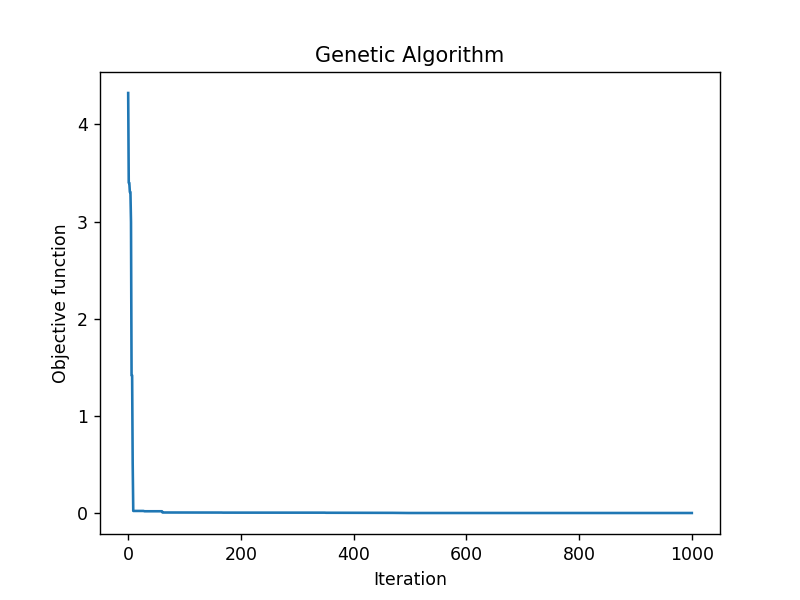

Время выполнения  22.277958869934082


In [5]:
t = time.time()
varbound = np.array([[-5,5]]*2)
model=ga(function=ackley_function,dimension=2,variable_type='real', variable_boundaries=varbound)
model.run()
t=time.time()-t
print('Время выполнения ', t)

### 100 прогонов для вычисления мат ожидания и  дисперсии

In [6]:
mean_list = []
# ga_algorithm_parameters={'max_num_iteration': None, 'population_size': 100, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': 200}

In [7]:
for i in range(100):
    print('Шаг итерации :', i)
    t = time.time()
    model=ga(function=ackley_function,
             dimension=2,
             variable_type='real',
             variable_boundaries=varbound,
             convergence_curve=False,
             progress_bar=False)
             #algorithm_parameters=ga_algorithm_parameters)
    model.run()
    t=time.time()-t
    print('Время выполнения ', t, '\n')
    mean_list.append(model.best_function)

Шаг итерации : 0
 The best solution found:
 [-1.19448041e-06 -2.60095251e-05]

 Objective function:
 7.366163580613261e-05
Время выполнения  18.06710433959961 

Шаг итерации : 1
 The best solution found:
 [4.52019079e-05 3.61159310e-06]

 Objective function:
 0.00012831249786771082
Время выполнения  17.93143129348755 

Шаг итерации : 2
 The best solution found:
 [ 6.91593691e-06 -5.13221058e-05]

 Objective function:
 0.00014654430950855613
Время выполнения  17.98276448249817 

Шаг итерации : 3
 The best solution found:
 [6.13746459e-06 4.69475259e-06]

 Objective function:
 2.1857330342101022e-05
Время выполнения  18.686148405075073 

Шаг итерации : 4
 The best solution found:
 [ 3.07922037e-05 -3.55241417e-05]

 Objective function:
 0.00013302875706244777
Время выполнения  18.882935285568237 

Шаг итерации : 5
 The best solution found:
 [ 1.88559333e-05 -1.41883498e-05]

 Objective function:
 6.67594454881737e-05
Время выполнения  19.4155592918396 

Шаг итерации : 6
 The best solutio

Время выполнения  9.067931890487671 

Шаг итерации : 51
 The best solution found:
 [ 8.51539193e-05 -1.05273092e-05]

 Objective function:
 0.00024288125351290546
Время выполнения  9.334024906158447 

Шаг итерации : 52
 The best solution found:
 [-6.11406800e-07  1.09136321e-05]

 Objective function:
 3.091999692017566e-05
Время выполнения  9.385464191436768 

Шаг итерации : 53
 The best solution found:
 [-1.04256199e-06  6.55329281e-06]

 Objective function:
 1.876978080517233e-05
Время выполнения  8.781198024749756 

Шаг итерации : 54
 The best solution found:
 [ 8.10490791e-05 -1.02520601e-06]

 Objective function:
 0.00022943470105829533
Время выполнения  8.8181471824646 

Шаг итерации : 55
 The best solution found:
 [-4.50839644e-05  4.57386202e-08]

 Objective function:
 0.00012757089746173733
Время выполнения  8.724631071090698 

Шаг итерации : 56
 The best solution found:
 [-0.00012385 -0.00022446]

 Objective function:
 0.0007268426257951432
Время выполнения  8.743122816085815

In [8]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  0.00028696620241593253
Дисперсия:  3.488629279838441e-07


#### Значение дисперсии является небольшим, следовательно можно сделать вывод, что алгоритм сходится

### Для функции Била

 The best solution found:                                                                           
 [3.05427985 0.51446877]

 Objective function:
 0.00048684490821442766


<IPython.core.display.Javascript object>


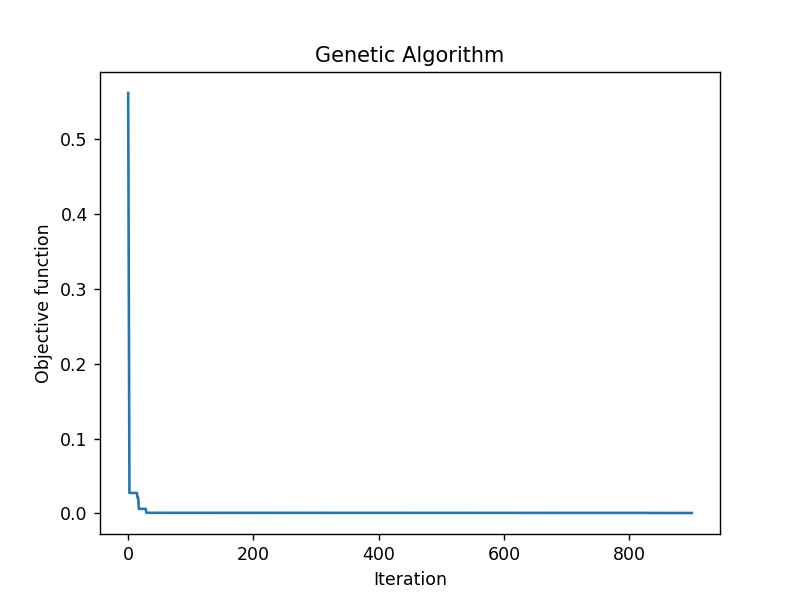

Время выполнения  9.32347583770752


In [13]:
t = time.time()
varbound = np.array([[-4.5,4.5]]*2)
model=ga(function=beale_function,dimension=2,variable_type='real', variable_boundaries=varbound)
model.run()
t=time.time()-t
print('Время выполнения ', t)

### 100 прогонов для вычисления мат ожидания и  дисперсии

In [10]:
mean_list = []

In [11]:
for i in range(100):
    print('Шаг итерации :', i)
    t = time.time()
    model=ga(function=beale_function,
             dimension=2,
             variable_type='real',
             variable_boundaries=varbound,
             convergence_curve=False,
             progress_bar=False)
             #algorithm_parameters=ga_algorithm_parameters)
    model.run()
    t=time.time()-t
    print('Время выполнения ', t, '\n')
    mean_list.append(model.best_function)

Шаг итерации : 0
 The best solution found:
 [2.98267229 0.49580714]

 Objective function:
 4.9403796802784656e-05
Время выполнения  8.264150857925415 

Шаг итерации : 1
 The best solution found:
 [2.99485575 0.49875991]

 Objective function:
 4.293514938277971e-06
Время выполнения  8.008150577545166 

Шаг итерации : 2
 The best solution found:
 [3.0863185  0.52051017]

 Objective function:
 0.0010858153687165642
Время выполнения  7.8982861042022705 

Шаг итерации : 3
 The best solution found:
 [3.09305824 0.52425578]

 Objective function:
 0.0013627328071521626
Время выполнения  7.800167560577393 

Шаг итерации : 4
 The best solution found:
 [2.9249569  0.48209552]

 Objective function:
 0.0010154477845028104
Время выполнения  7.865068435668945 

Шаг итерации : 5
 The best solution found:
 [3.02442874 0.50674501]

 Objective function:
 0.00010634451145832614
Время выполнения  7.796537637710571 

Шаг итерации : 6
 The best solution found:
 [3.03711309 0.51000205]

 Objective function:
 

 The best solution found:
 [2.90968844 0.47381537]

 Objective function:
 0.0016208885822972235
Время выполнения  7.789182186126709 

Шаг итерации : 55
 The best solution found:
 [3.12141833 0.53058604]

 Objective function:
 0.0021722344747270752
Время выполнения  7.768915176391602 

Шаг итерации : 56
 The best solution found:
 [2.97631084 0.49108532]

 Objective function:
 0.0002898926104244834
Время выполнения  7.682378053665161 

Шаг итерации : 57
 The best solution found:
 [3.0608563  0.51530169]

 Objective function:
 0.0005631053892884541
Время выполнения  7.781917572021484 

Шаг итерации : 58
 The best solution found:
 [2.99278427 0.49820219]

 Objective function:
 8.401214024183146e-06
Время выполнения  7.739023447036743 

Шаг итерации : 59
 The best solution found:
 [2.97415965 0.49290731]

 Objective function:
 0.00011844948633435163
Время выполнения  7.809786319732666 

Шаг итерации : 60
 The best solution found:
 [2.9254132  0.48169901]

 Objective function:
 0.00098084952

In [12]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  0.00042362138869126597
Дисперсия:  3.1368483604959585e-07


#### Значение дисперсии является небольшим, следовательно можно сделать вывод, что алгоритм сходится

### Для функции Изома

 The best solution found:                                                                           
 [3.14159253 3.14159272]

 Objective function:
 -0.9999999999999694


<IPython.core.display.Javascript object>


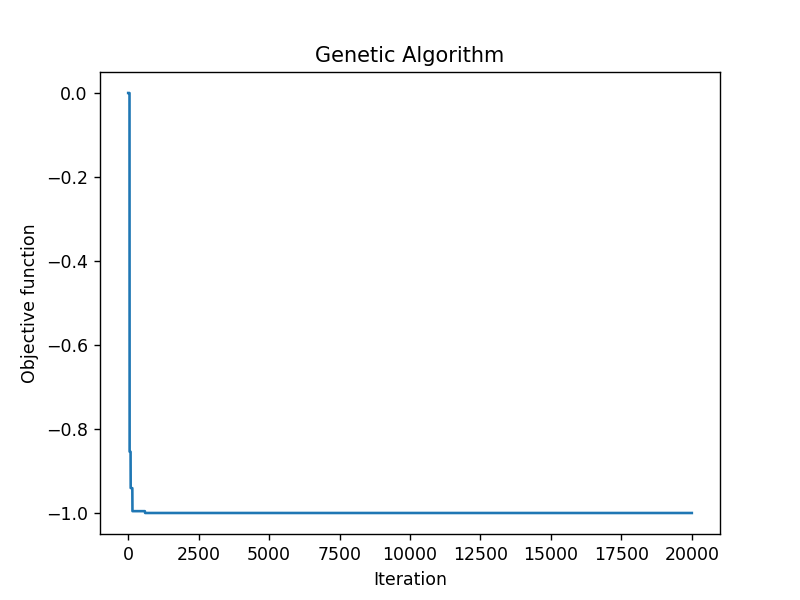

Время выполнения  235.01891899108887


In [44]:
t = time.time()
varbound = np.array([[-100,100]]*2)
model=ga(function=easom_function,dimension=2,variable_type='real', variable_boundaries=varbound)
model.run()
t=time.time()-t
print('Время выполнения ', t)

### 100 прогонов для вычисления мат ожидания и  дисперсии

In [45]:
mean_list = []

In [46]:
for i in range(100):
    print('Шаг итерации :', i)
    t = time.time()
    model=ga(function=easom_function,
             dimension=2,
             variable_type='real',
             variable_boundaries=varbound,
             convergence_curve=False,
             progress_bar=False)
             #algorithm_parameters=ga_algorithm_parameters)
    model.run()
    t=time.time()-t
    print('Время выполнения ', t, '\n')
    mean_list.append(model.best_function)

Шаг итерации : 0


KeyboardInterrupt: 

In [48]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  -0.9999999962094056
Дисперсия:  3.2721505311513295e-16


#### Значение дисперсии крайне мало, следовательно можно сделать вывод, что алгоритм сходится

# Алгоритм роя частиц

In [20]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher, Designer

### Для функции Экли

In [21]:
def ackley_function2(x):
    j = (
        -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x ** 2).sum(axis=1)))
        - np.exp(0.5 * np.cos(2 * np.pi * x).sum(axis=1))
        + 20.0 + np.e
    )
    return j

2021-11-20 19:55:36,906 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=3.39e-11
2021-11-20 19:55:37,188 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.3925307008075833e-11, best pos: [-1.12742419e-11  4.09495340e-12]


<IPython.core.display.Javascript object>


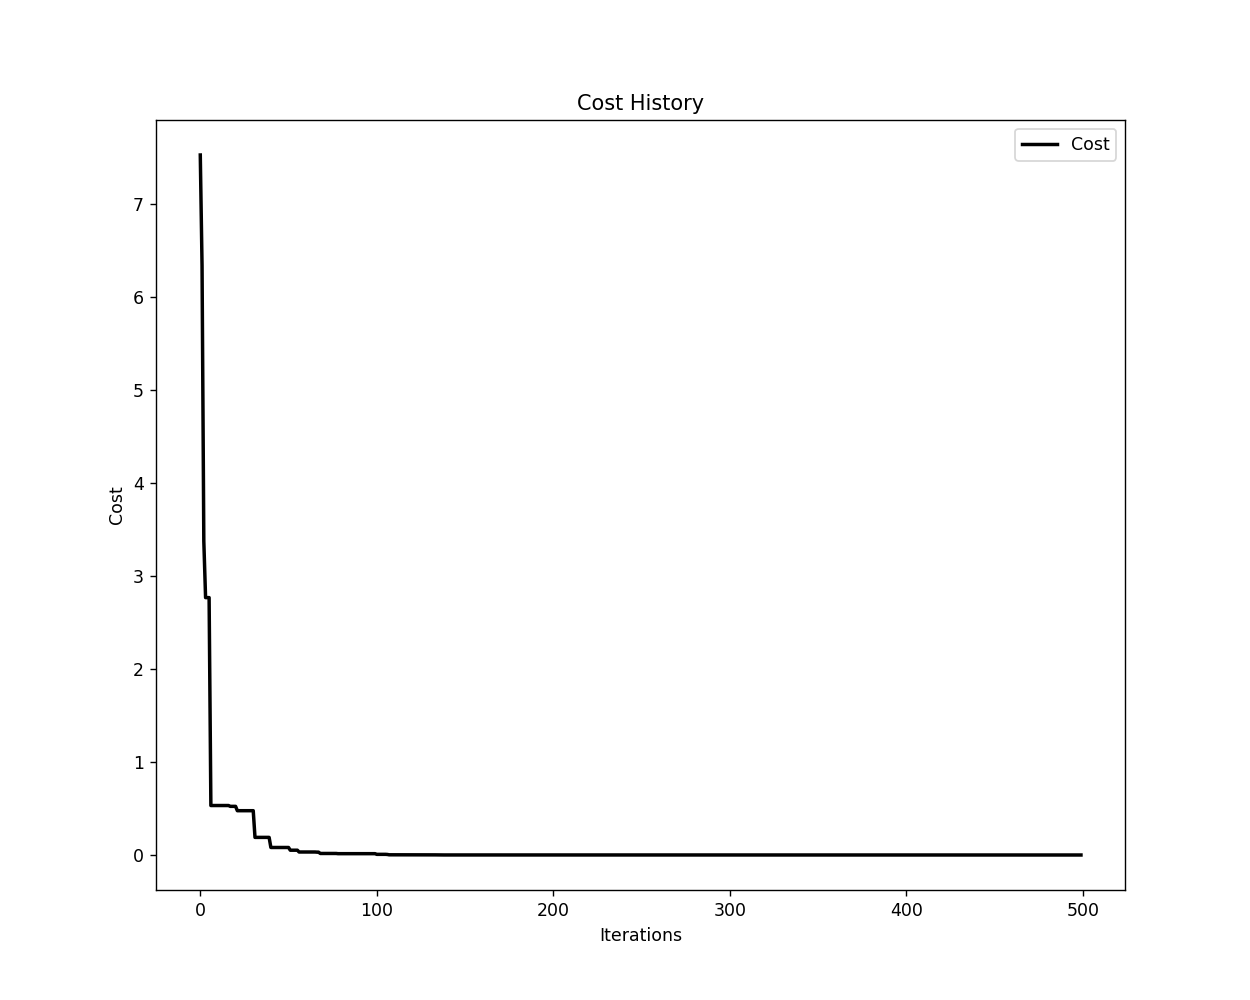

Время выполнения  0.30715274810791016


In [22]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
# Create bounds
max_bound = 5.0 * np.ones(2)
min_bound = - max_bound
varbound = (min_bound, max_bound)

t=time.time()
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=varbound)
cost, pos = optimizer.optimize(ackley_function2, iters=500)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
t=time.time()-t
print('Время выполнения ', t)

In [23]:
print('Координата лучшего решения ', pos)
print('Наименьшее достигнутое значение функции ', cost)

Координата лучшего решения  [-1.12742419e-11  4.09495340e-12]
Наименьшее достигнутое значение функции  3.3925307008075833e-11


<IPython.core.display.Javascript object>


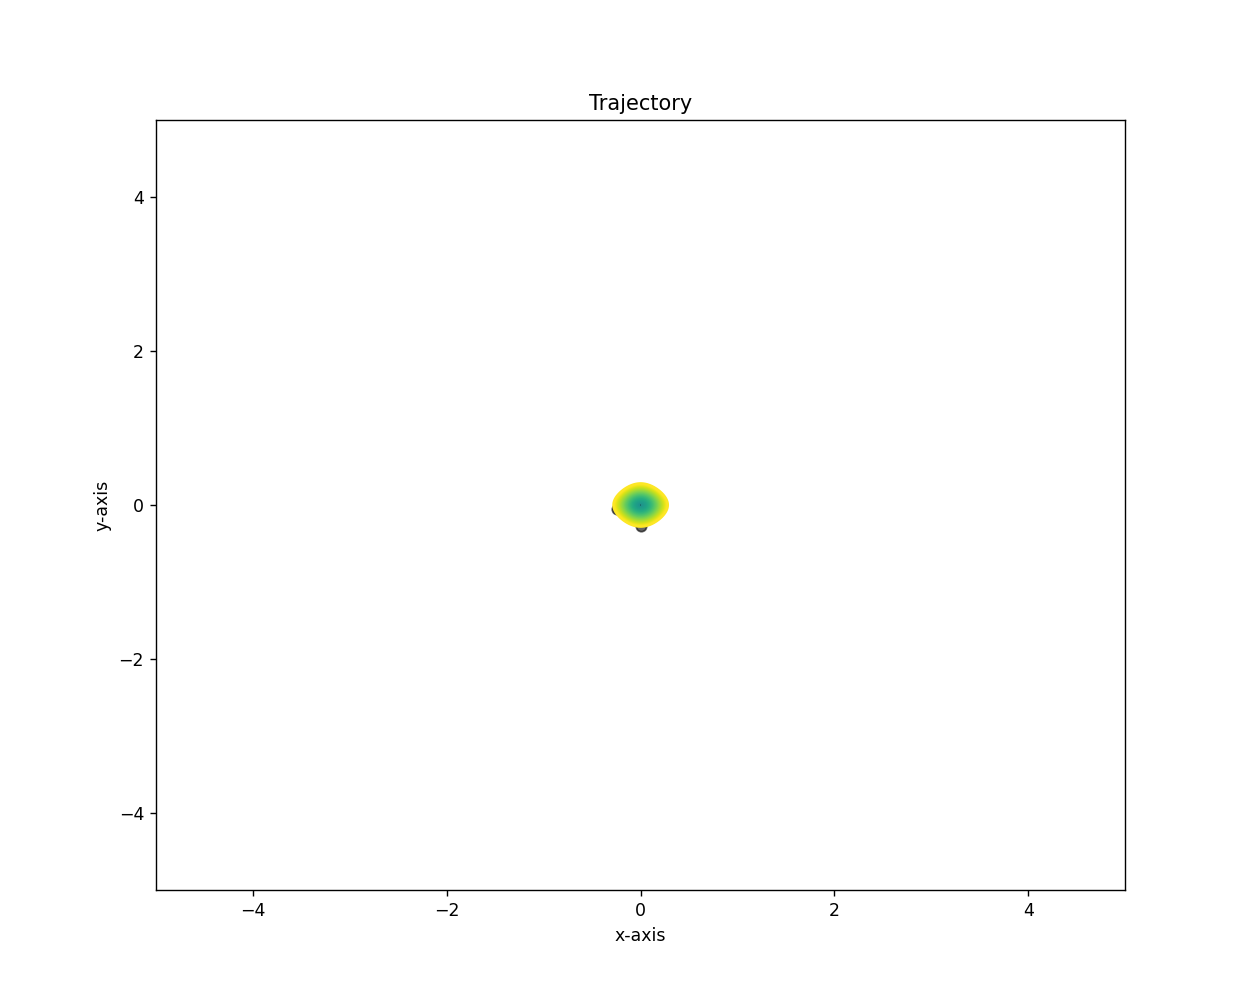

In [24]:
# Initialize mesher with sphere function
m = Mesher(func=ackley_function2)
d = Designer(limits=[(-5,5), (-5,5), (-1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m, designer=d,
                         mark=(0,0))

In [25]:
animation.save('Ackley swarm.gif', writer='imagemagick', fps=10)

2021-11-20 19:56:04,091 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2021-11-20 19:56:04,092 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


### 100 прогонов для вычисления мат ожидания и  дисперсии

In [26]:
mean_list = []

In [27]:
for i in range(100):
    print('Шаг итерации :', i)
    t=time.time()
    optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=varbound)
    cost, pos = optimizer.optimize(ackley_function2, iters=500)
    t=time.time()-t
    print('Время выполнения ', t)
    mean_list.append(cost)

2021-11-20 19:56:29,048 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Шаг итерации : 0


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.99e-11
2021-11-20 19:56:29,315 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.9884982549456254e-11, best pos: [-3.53018192e-12  6.07948272e-12]
2021-11-20 19:56:29,319 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2712738513946533
Шаг итерации : 1


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=5.7e-11
2021-11-20 19:56:29,615 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.6985971497169885e-11, best pos: [1.90191503e-11 6.64758932e-12]
2021-11-20 19:56:29,621 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2993602752685547
Шаг итерации : 2


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.15e-11
2021-11-20 19:56:29,923 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.148015099123768e-11, best pos: [7.45720663e-12 1.43435403e-12]
2021-11-20 19:56:29,932 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.30817413330078125
Шаг итерации : 3


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=6.97e-11
2021-11-20 19:56:30,214 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.974731903142128e-11, best pos: [-1.30626679e-11  2.09149955e-11]
2021-11-20 19:56:30,228 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2922186851501465
Шаг итерации : 4


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.98e-11
2021-11-20 19:56:30,533 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.9821922709061255e-11, best pos: [-1.00213461e-11  3.27784312e-12]
2021-11-20 19:56:30,548 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.31914615631103516
Шаг итерации : 5


pyswarms.single.global_best:  79%|█████████████████████████████████████████████▎           |397/500, best_cost=2.96e-10IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.69e-10
2021-11-20 19:56:32,488 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.6872415404000094e-10, best pos: [-9.49967363e-11  1.45902760e-12]
2021-11-20 19:56:32,505 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2731781005859375
Шаг итерации : 12


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.01e-12
2021-11-20 19:56:32,787 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0058620603103918e-12, best pos: [ 8.12166883e-14 -3.46201743e-13]
2021-11-20 19:56:32,791 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.29720497131347656
Шаг итерации : 13


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.72e-12
2021-11-20 19:56:33,079 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.7199575097492925e-12, best pos: [-3.68192399e-13  4.84591524e-13]
2021-11-20 19:56:33,084 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2922182083129883
Шаг итерации : 14


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=1.1e-11
2021-11-20 19:56:33,365 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.09889874977398e-11, best pos: [-2.22132607e-12 -3.18772682e-12]
2021-11-20 19:56:33,373 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2858407497406006
Шаг итерации : 15


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.16e-11
2021-11-20 19:56:33,654 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1614265105208688e-11, best pos: [-3.26023084e-12  2.49562317e-12]
2021-11-20 19:56:33,666 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28922605514526367
Шаг итерации : 16


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=7.53e-12
2021-11-20 19:56:33,942 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.528644374588112e-12, best pos: [ 3.54309014e-13 -2.63754753e-12]
2021-11-20 19:56:33,959 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28822922706604004
Шаг итерации : 17


pyswarms.single.global_best:  37%|█████████████████████▌                                    |186/500, best_cost=1.84e-5IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.41e-11
2021-11-20 19:56:35,800 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.4126922681944052e-11, best pos: [8.43787185e-12 1.25165388e-12]
2021-11-20 19:56:35,812 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2543480396270752
Шаг итерации : 24


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=5.18e-11
2021-11-20 19:56:36,111 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.178835138508475e-11, best pos: [ 1.26466819e-11 -1.32403712e-11]
2021-11-20 19:56:36,122 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3111684322357178
Шаг итерации : 25


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=5.88e-12
2021-11-20 19:56:36,376 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.88373794130348e-12, best pos: [-1.88237367e-12  8.86373378e-13]
2021-11-20 19:56:36,380 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26329469680786133
Шаг итерации : 26


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=8.14e-12
2021-11-20 19:56:36,701 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.143263841020598e-12, best pos: [-1.89809289e-12  2.16571840e-12]
2021-11-20 19:56:36,708 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3251485824584961
Шаг итерации : 27


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.16e-11
2021-11-20 19:56:36,987 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1603606964172286e-11, best pos: [ 5.46409995e-13 -4.06632919e-12]
2021-11-20 19:56:36,992 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28623294830322266
Шаг итерации : 28


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.02e-12
2021-11-20 19:56:37,281 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0236256287043943e-12, best pos: [2.60222213e-13 2.50455663e-13]
2021-11-20 19:56:37,288 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2942516803741455
Шаг итерации : 29


pyswarms.single.global_best:   0%|                                                             |0/500, best_cost=0.0423IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=8.52e-12
2021-11-20 19:56:38,900 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.523404204652252e-12, best pos: [ 1.23013559e-12 -2.75107105e-12]
2021-11-20 19:56:38,906 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2513277530670166
Шаг итерации : 35


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.05e-11
2021-11-20 19:56:39,150 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0467627592779536e-11, best pos: [ 6.64617168e-12 -2.86273329e-12]
2021-11-20 19:56:39,156 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.24961256980895996
Шаг итерации : 36


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.12e-12
2021-11-20 19:56:39,437 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.1249668691325496e-12, best pos: [ 6.09548405e-13 -4.38182894e-13]
2021-11-20 19:56:39,447 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28822922706604004
Шаг итерации : 37


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.65e-11
2021-11-20 19:56:39,724 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.652411540931098e-11, best pos: [ 4.56691569e-12 -3.64197957e-12]
2021-11-20 19:56:39,740 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28661322593688965
Шаг итерации : 38


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.73e-12
2021-11-20 19:56:40,024 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.7270629371068935e-12, best pos: [2.91216214e-13 5.36079809e-13]
2021-11-20 19:56:40,031 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.29919934272766113
Шаг итерации : 39


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=5.03e-12
2021-11-20 19:56:40,289 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.031086658391359e-12, best pos: [-1.76182834e-12  2.43758179e-13]
2021-11-20 19:56:40,294 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2652907371520996
Шаг итерации : 40


pyswarms.single.global_best:  33%|██████████████████▉                                       |163/500, best_cost=3.41e-7IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=1.6e-11
2021-11-20 19:56:42,172 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.5973444789096902e-11, best pos: [4.18075658e-13 5.63191276e-12]
2021-11-20 19:56:42,185 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.24933290481567383
Шаг итерации : 47


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=1.3e-11
2021-11-20 19:56:42,439 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2964296303152878e-11, best pos: [-1.28398967e-12 -4.39965268e-12]
2021-11-20 19:56:42,444 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2672853469848633
Шаг итерации : 48


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.15e-11
2021-11-20 19:56:42,671 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1546763545311478e-11, best pos: [4.08200358e-12 2.47686707e-14]
2021-11-20 19:56:42,676 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2293863296508789
Шаг итерации : 49


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=3.06e-12
2021-11-20 19:56:42,965 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.055777852978281e-12, best pos: [1.07604018e-12 9.14756470e-14]
2021-11-20 19:56:42,971 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.29421305656433105
Шаг итерации : 50


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.64e-13
2021-11-20 19:56:43,262 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.638689184346731e-13, best pos: [4.83064189e-14 3.15609100e-14]
2021-11-20 19:56:43,272 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.29720401763916016
Шаг итерации : 51


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.89e-11
2021-11-20 19:56:43,545 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.8891111725215524e-11, best pos: [ 2.00763926e-12 -1.00146913e-11]
2021-11-20 19:56:43,560 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28330206871032715
Шаг итерации : 52


pyswarms.single.global_best:   0%|                                                            |0/500, best_cost=2.57e-5IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.37e-11
2021-11-20 19:56:45,431 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3735235171452587e-11, best pos: [4.76009863e-12 9.58976345e-13]
2021-11-20 19:56:45,447 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25433349609375
Шаг итерации : 59


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.32e-12
2021-11-20 19:56:45,681 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.3168134077877767e-12, best pos: [ 7.31087625e-13 -3.68472702e-13]
2021-11-20 19:56:45,684 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2483353614807129
Шаг итерации : 60


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=3.31e-11
2021-11-20 19:56:45,950 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.311884100298812e-11, best pos: [1.09485043e-11 4.15206627e-12]
2021-11-20 19:56:45,953 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26929306983947754
Шаг итерации : 61


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.37e-11
2021-11-20 19:56:46,243 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3745893312488988e-11, best pos: [-3.96501253e-12  2.80944359e-12]
2021-11-20 19:56:46,248 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2932164669036865
Шаг итерации : 62


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.73e-11
2021-11-20 19:56:46,535 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.7277290709216686e-11, best pos: [-8.39262414e-13 -6.05071974e-12]
2021-11-20 19:56:46,540 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.29041576385498047
Шаг итерации : 63


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=8.87e-11
2021-11-20 19:56:46,821 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.868328293942795e-11, best pos: [-1.25663576e-11  2.87261865e-11]
2021-11-20 19:56:46,826 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28623485565185547
Шаг итерации : 64


pyswarms.single.global_best:   0%|                                                             |0/500, best_cost=0.0534IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.02e-12
2021-11-20 19:56:48,467 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0236256287043943e-12, best pos: [-2.89331728e-13 -2.17144819e-13]
2021-11-20 19:56:48,484 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26326918601989746
Шаг итерации : 70


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=5.16e-12
2021-11-20 19:56:48,734 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.162537064506978e-12, best pos: [-7.22068748e-13 -1.67635678e-12]
2021-11-20 19:56:48,739 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26755452156066895
Шаг итерации : 71


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=1.2e-11
2021-11-20 19:56:48,984 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1965983759409937e-11, best pos: [ 3.87666192e-12 -1.69137470e-12]
2021-11-20 19:56:48,990 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.249314546585083
Шаг итерации : 72


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=1.9e-12
2021-11-20 19:56:49,243 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.901145907368118e-12, best pos: [-4.04233671e-13 -5.37223860e-13]
2021-11-20 19:56:49,249 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25832200050354004
Шаг итерации : 73


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.09e-12
2021-11-20 19:56:49,547 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0894397323445446e-12, best pos: [-5.78462705e-13 -4.58408602e-13]
2021-11-20 19:56:49,559 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3032104969024658
Шаг итерации : 74


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=9.7e-12
2021-11-20 19:56:49,838 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.695799718656417e-12, best pos: [ 2.84892389e-12 -1.90737457e-12]
2021-11-20 19:56:49,857 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2922184467315674
Шаг итерации : 75


pyswarms.single.global_best:  79%|██████████████████████████████████████████████            |397/500, best_cost=9.1e-10IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=5.14e-11
2021-11-20 19:56:51,873 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.135847302994989e-11, best pos: [4.72307079e-12 1.75326909e-11]
2021-11-20 19:56:51,881 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2576766014099121
Шаг итерации : 82


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=2.6e-12
2021-11-20 19:56:52,130 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.5974777884130162e-12, best pos: [-7.72438774e-13 -4.95357319e-13]
2021-11-20 19:56:52,141 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2573127746582031
Шаг итерации : 83


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=1.2e-10
2021-11-20 19:56:52,387 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.20256249402928e-10, best pos: [-3.12059820e-11 -2.88757648e-11]
2021-11-20 19:56:52,405 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2573115825653076
Шаг итерации : 84


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=3.66e-11
2021-11-20 19:56:52,650 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.6554315130388204e-11, best pos: [1.27557840e-11 2.08055126e-12]
2021-11-20 19:56:52,657 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26130080223083496
Шаг итерации : 85


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.39e-10
2021-11-20 19:56:52,898 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3875167681476341e-10, best pos: [-3.46267154e-11 -3.47484307e-11]
2021-11-20 19:56:52,903 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.24692845344543457
Шаг итерации : 86


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=7.24e-11
2021-11-20 19:56:53,217 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.237277444005485e-11, best pos: [ 4.91998083e-12 -2.51100620e-11]
2021-11-20 19:56:53,222 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3181486129760742
Шаг итерации : 87


pyswarms.single.global_best:  31%|█████████████████▋                                        |153/500, best_cost=6.33e-6IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.82e-12
2021-11-20 19:56:55,038 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.815880779076906e-12, best pos: [-5.08994214e-13 -3.90863940e-13]
2021-11-20 19:56:55,049 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25830960273742676
Шаг итерации : 93


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=3.07e-12
2021-11-20 19:56:55,301 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.069988707693483e-12, best pos: [3.60182366e-14 1.08532557e-12]
2021-11-20 19:56:55,313 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2633082866668701
Шаг итерации : 94


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=9.25e-12
2021-11-20 19:56:55,549 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.251710508806354e-12, best pos: [ 2.98985067e-12 -1.32699354e-12]
2021-11-20 19:56:55,554 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.24634099006652832
Шаг итерации : 95


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=9.92e-13
2021-11-20 19:56:55,834 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.916512055951898e-13, best pos: [-3.40145817e-13  8.19796822e-14]
2021-11-20 19:56:55,840 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2852487564086914
Шаг итерации : 96


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.19e-11
2021-11-20 19:56:56,106 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1887824058476326e-11, best pos: [-2.51667625e-12 -3.36566620e-12]
2021-11-20 19:56:56,111 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2712836265563965
Шаг итерации : 97


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=9.28e-12
2021-11-20 19:56:56,401 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.280132218236758e-12, best pos: [-3.13261450e-12  9.77920728e-13]
2021-11-20 19:56:56,407 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.296205997467041
Шаг итерации : 98


pyswarms.single.global_best:  75%|███████████████████████████████████████████▍              |374/500, best_cost=1.4e-10IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  2.4559820843705894e-11
Дисперсия:  1.4161439140696923e-21


#### Значение дисперсии крайне мало, что говорит о сходимости алгоритма оптимизации

### Для функции Била

In [29]:
def beale_function2(x):
    x_ = x[:, 0]
    y_ = x[:, 1]
    j = (
        (1.5 - x_ + x_ * y_) ** 2
        + (2.25 - x_ + x_ * y_ ** 2.0) ** 2
        + (2.625 - x_ + x_ * y_ ** 3.0) ** 2
    )
    return j

2021-11-20 19:57:12,379 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.41e-22
2021-11-20 19:57:12,656 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.4115383196971753e-22, best pos: [3.  0.5]


<IPython.core.display.Javascript object>


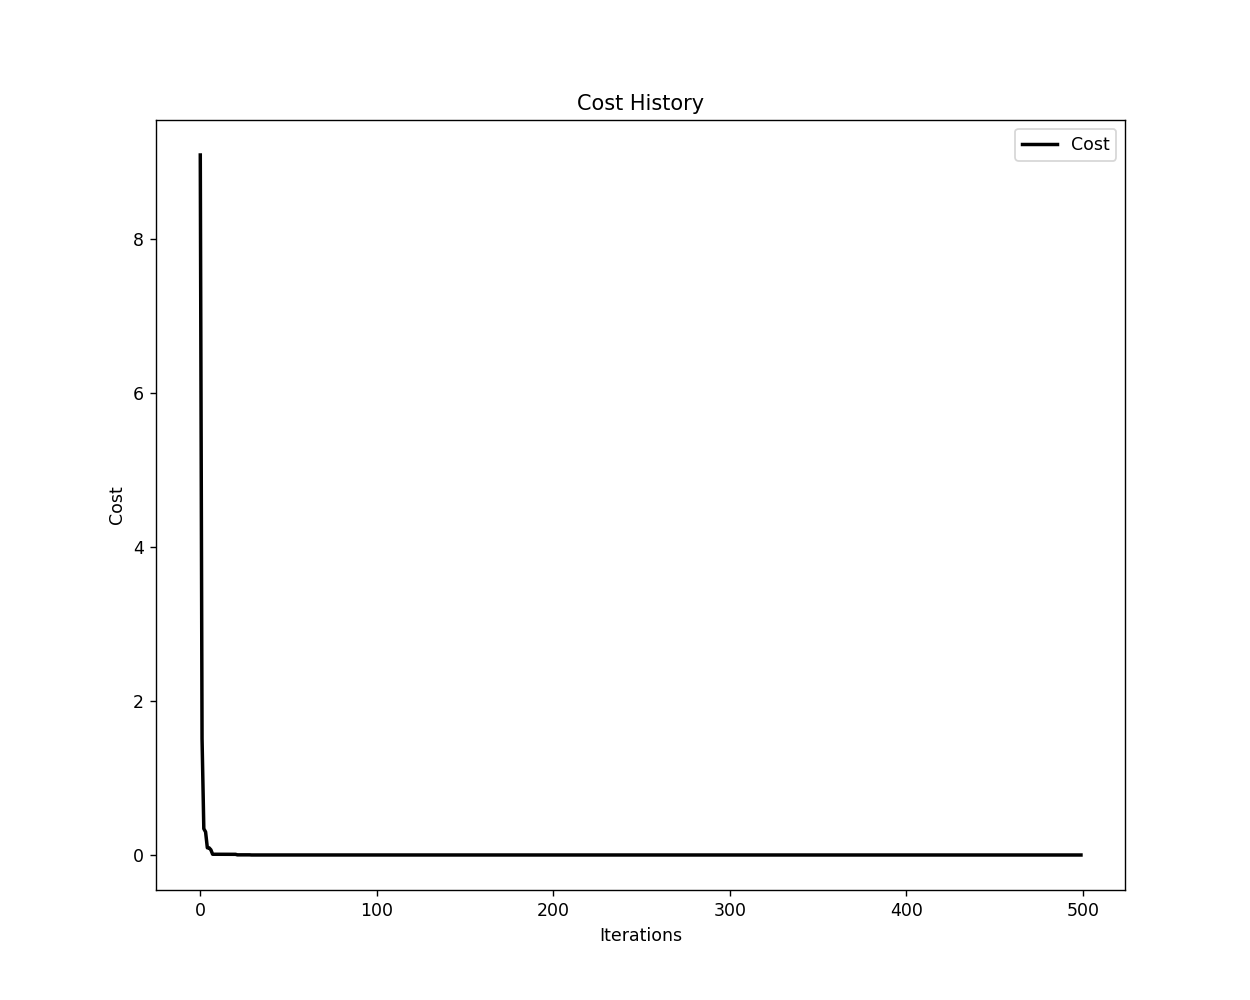

Время выполнения  0.30219197273254395


In [30]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
# Create bounds
max_bound = 4.5 * np.ones(2)
min_bound = - max_bound
varbound = (min_bound, max_bound)

t=time.time()
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=varbound)
cost, pos = optimizer.optimize(beale_function2, iters=500)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
t=time.time()-t
print('Время выполнения ', t)

In [31]:
print('Координата лучшего решения ', pos)
print('Наименьшее достигнутое значение функции ', cost)

Координата лучшего решения  [3.  0.5]
Наименьшее достигнутое значение функции  2.4115383196971753e-22


<IPython.core.display.Javascript object>


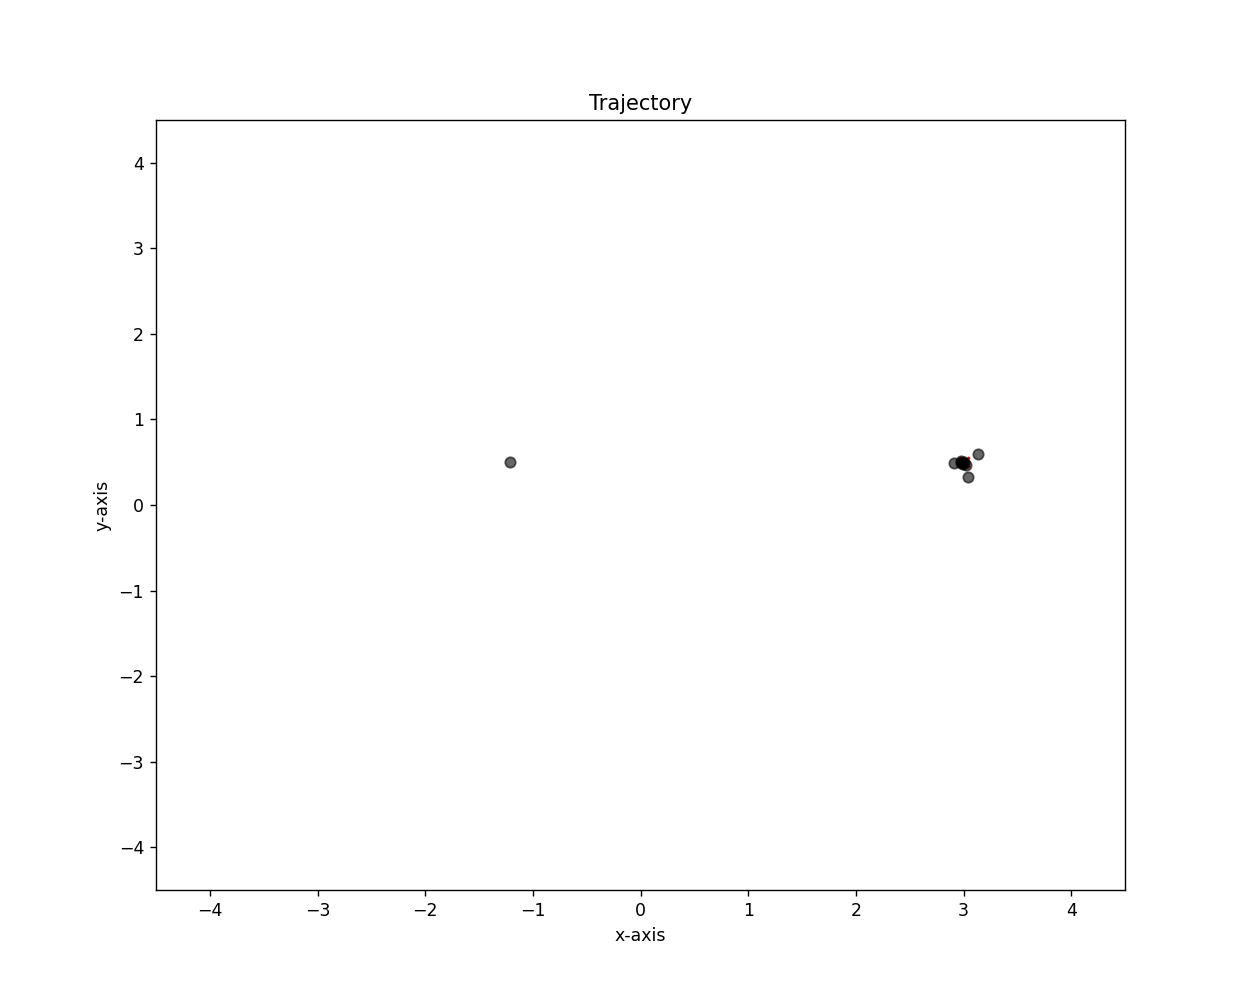

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\pyswarms\utils\plotters\plotters.py:222: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz, levels=mesher.levels)


In [32]:
# Initialize mesher with sphere function
m = Mesher(func=beale_function2)
d = Designer(limits=[(-4.5,4.5), (-4.5,4.5), (-1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m, designer=d,
                         mark=(3,0.5))

In [33]:
animation.save('Bealey swarm.gif', writer='imagemagick', fps=10)

2021-11-20 19:57:33,319 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2021-11-20 19:57:33,320 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


### 100 прогонов для вычисления мат ожидания и  дисперсии

In [90]:
mean_list = []

In [91]:
for i in range(100):
    print('Шаг итерации :', i)
    t=time.time()
    optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=varbound)
    cost, pos = optimizer.optimize(beale_function2, iters=500)
    t=time.time()-t
    print('Время выполнения ', t)
    mean_list.append(cost)

2021-11-20 20:16:06,647 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Шаг итерации : 0


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=5.49e-22
2021-11-20 20:16:06,923 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.491731494020612e-22, best pos: [3.  0.5]
2021-11-20 20:16:06,928 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28121423721313477
Шаг итерации : 1


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=9.15e-18
2021-11-20 20:16:07,241 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.147628644575615e-18, best pos: [2.99999999 0.5       ]
2021-11-20 20:16:07,247 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3179171085357666
Шаг итерации : 2


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=3.35e-8
2021-11-20 20:16:07,563 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.350201209015223e-08, best pos: [3.00045762 0.50011337]
2021-11-20 20:16:07,567 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.32213616371154785
Шаг итерации : 3


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.55e-19
2021-11-20 20:16:07,883 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.5532717729672742e-19, best pos: [3.  0.5]
2021-11-20 20:16:07,889 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.31914734840393066
Шаг итерации : 4


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=5.36e-9
2021-11-20 20:16:08,183 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.355875812090211e-09, best pos: [2.99982357 0.49995223]
2021-11-20 20:16:08,191 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.30022621154785156
Шаг итерации : 5


pyswarms.single.global_best:  75%|██████████████████████████████████████████▊              |375/500, best_cost=2.86e-19IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.74e-21
2021-11-20 20:16:10,125 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.7434819862180418e-21, best pos: [3.  0.5]
2021-11-20 20:16:10,134 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28234100341796875
Шаг итерации : 12


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=5.45e-18
2021-11-20 20:16:10,436 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.453949091264471e-18, best pos: [2.99999999 0.5       ]
2021-11-20 20:16:10,451 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.31116676330566406
Шаг итерации : 13


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.32e-18
2021-11-20 20:16:10,742 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.318934811345456e-18, best pos: [3.  0.5]
2021-11-20 20:16:10,759 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.30518388748168945
Шаг итерации : 14


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.68e-22
2021-11-20 20:16:11,080 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6763767493633214e-22, best pos: [3.  0.5]
2021-11-20 20:16:11,084 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.33600378036499023
Шаг итерации : 15


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=3.79e-7
2021-11-20 20:16:11,355 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.7875271978566985e-07, best pos: [2.99848465 0.49960256]
2021-11-20 20:16:11,379 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.27426719665527344
Шаг итерации : 16


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.13e-13
2021-11-20 20:16:11,706 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.1289697306085903e-13, best pos: [3.00000027 0.50000016]
2021-11-20 20:16:11,713 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.35103440284729004
Шаг итерации : 17


pyswarms.single.global_best:  39%|██████████████████████▎                                  |196/500, best_cost=1.88e-12IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.42e-19
2021-11-20 20:16:13,131 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.421481244794784e-19, best pos: [3.  0.5]
2021-11-20 20:16:13,144 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2682814598083496
Шаг итерации : 22


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=5.77e-18
2021-11-20 20:16:13,392 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.771276029107678e-18, best pos: [3.  0.5]
2021-11-20 20:16:13,409 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26130104064941406
Шаг итерации : 23


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.88e-21
2021-11-20 20:16:13,720 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.8784519195091353e-21, best pos: [3.  0.5]
2021-11-20 20:16:13,724 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.32544469833374023
Шаг итерации : 24


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=3.4e-20
2021-11-20 20:16:14,020 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.3951765246143725e-20, best pos: [3.  0.5]
2021-11-20 20:16:14,026 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.301194429397583
Шаг итерации : 25


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.81e-21
2021-11-20 20:16:14,317 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.8108207937427454e-21, best pos: [3.  0.5]
2021-11-20 20:16:14,325 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2962074279785156
Шаг итерации : 26


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.34e-17
2021-11-20 20:16:14,622 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.3415458402578423e-17, best pos: [3.00000001 0.5       ]
2021-11-20 20:16:14,628 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3041870594024658
Шаг итерации : 27


pyswarms.single.global_best:  33%|██████████████████▌                                      |163/500, best_cost=1.13e-15IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.45e-20
2021-11-20 20:16:16,552 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.4491518318114148e-20, best pos: [3.  0.5]
2021-11-20 20:16:16,561 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2652907371520996
Шаг итерации : 34


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=4.37e-17
2021-11-20 20:16:16,819 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.368811074740339e-17, best pos: [3.00000001 0.5       ]
2021-11-20 20:16:16,830 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2672851085662842
Шаг итерации : 35


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=0.000274
2021-11-20 20:16:17,108 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0002735328716889908, best pos: [3.04231386 0.51030508]
2021-11-20 20:16:17,125 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28822827339172363
Шаг итерации : 36


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.66e-22
2021-11-20 20:16:17,404 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6586883395781543e-22, best pos: [3.  0.5]
2021-11-20 20:16:17,409 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2961416244506836
Шаг итерации : 37


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.51e-23
2021-11-20 20:16:17,708 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.505043705186985e-23, best pos: [3.  0.5]
2021-11-20 20:16:17,713 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3041863441467285
Шаг итерации : 38


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=3.09e-19
2021-11-20 20:16:18,014 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.08570665739847e-19, best pos: [3.  0.5]
2021-11-20 20:16:18,019 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.30518484115600586
Шаг итерации : 39


pyswarms.single.global_best:   0%|                                                            |0/500, best_cost=2.28e-7IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.24e-10
2021-11-20 20:16:19,731 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.237511946812933e-10, best pos: [2.9999722  0.49999309]
2021-11-20 20:16:19,739 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26613378524780273
Шаг итерации : 45


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.73e-19
2021-11-20 20:16:20,006 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.7265562264000435e-19, best pos: [3.  0.5]
2021-11-20 20:16:20,018 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.27613234519958496
Шаг итерации : 46


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=6.77e-13
2021-11-20 20:16:20,286 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.769508702302432e-13, best pos: [3.00000206 0.50000051]
2021-11-20 20:16:20,307 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28224706649780273
Шаг итерации : 47


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=4.12e-19
2021-11-20 20:16:20,592 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.1186426397714636e-19, best pos: [3.  0.5]
2021-11-20 20:16:20,597 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.30298399925231934
Шаг итерации : 48


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.85e-19
2021-11-20 20:16:20,888 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.847913677943546e-19, best pos: [3.  0.5]
2021-11-20 20:16:20,893 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.29620814323425293
Шаг итерации : 49


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=8.15e-22
2021-11-20 20:16:21,193 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.145104764247625e-22, best pos: [3.  0.5]
2021-11-20 20:16:21,197 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3041865825653076
Шаг итерации : 50


pyswarms.single.global_best:  67%|██████████████████████████████████████▍                  |337/500, best_cost=1.34e-19IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=9.92e-21
2021-11-20 20:16:23,178 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.921534432638113e-21, best pos: [3.  0.5]
2021-11-20 20:16:23,185 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26049304008483887
Шаг итерации : 57


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=4.32e-23
2021-11-20 20:16:23,447 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.3171126529012276e-23, best pos: [3.  0.5]
2021-11-20 20:16:23,459 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2682821750640869
Шаг итерации : 58


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.03e-16
2021-11-20 20:16:23,729 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0254253199515498e-16, best pos: [3.00000003 0.50000001]
2021-11-20 20:16:23,740 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2823209762573242
Шаг итерации : 59


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.61e-11
2021-11-20 20:16:24,023 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.609543737967867e-11, best pos: [2.99998761 0.49999667]
2021-11-20 20:16:24,028 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.29421257972717285
Шаг итерации : 60


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=5.01e-5
2021-11-20 20:16:24,328 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.005575642910457e-05, best pos: [2.98292811 0.49540284]
2021-11-20 20:16:24,336 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.30518460273742676
Шаг итерации : 61


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|500/500, best_cost=2.43e-7
2021-11-20 20:16:24,634 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.432340993419501e-07, best pos: [3.00123329 0.50030788]
2021-11-20 20:16:24,645 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3051936626434326
Шаг итерации : 62


pyswarms.single.global_best:  37%|█████████████████████▎                                   |187/500, best_cost=0.000489IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=4.02e-22
2021-11-20 20:16:26,609 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.024950909200759e-22, best pos: [3.  0.5]
2021-11-20 20:16:26,617 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.27227139472961426
Шаг итерации : 69


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.53e-19
2021-11-20 20:16:26,859 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.527938208122525e-19, best pos: [3.  0.5]
2021-11-20 20:16:26,863 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.24933314323425293
Шаг итерации : 70


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.01e-19
2021-11-20 20:16:27,154 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0069858222527785e-19, best pos: [3.  0.5]
2021-11-20 20:16:27,158 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.29421281814575195
Шаг итерации : 71


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.44e-20
2021-11-20 20:16:27,459 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.440087276337268e-20, best pos: [3.  0.5]
2021-11-20 20:16:27,465 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3045644760131836
Шаг итерации : 72


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=5.81e-21
2021-11-20 20:16:27,761 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.810597480539571e-21, best pos: [3.  0.5]
2021-11-20 20:16:27,773 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3015155792236328
Шаг итерации : 73


pyswarms.single.global_best:  70%|████████████████████████████████████████▍                 |349/500, best_cost=2.3e-17IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.34e-20
2021-11-20 20:16:29,734 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.3384561157423193e-20, best pos: [3.  0.5]
2021-11-20 20:16:29,742 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.24933385848999023
Шаг итерации : 80


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=6.09e-19
2021-11-20 20:16:29,993 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.091433369409845e-19, best pos: [3.  0.5]
2021-11-20 20:16:30,006 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2593059539794922
Шаг итерации : 81


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|500/500, best_cost=9.7e-6
2021-11-20 20:16:30,269 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.695299469837469e-06, best pos: [2.9926987  0.49796521]
2021-11-20 20:16:30,273 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.276261568069458
Шаг итерации : 82


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|500/500, best_cost=8e-20
2021-11-20 20:16:30,517 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.004256124481992e-20, best pos: [3.  0.5]
2021-11-20 20:16:30,521 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.24733948707580566
Шаг итерации : 83


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=6.49e-23
2021-11-20 20:16:30,821 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.49106825558324e-23, best pos: [3.  0.5]
2021-11-20 20:16:30,827 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.3041958808898926
Шаг итерации : 84


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=3.01e-12
2021-11-20 20:16:31,119 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.0148286689233026e-12, best pos: [2.99999566 0.49999891]
2021-11-20 20:16:31,128 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2982020378112793
Шаг итерации : 85


pyswarms.single.global_best:  36%|████████████████████▉                                     |181/500, best_cost=8.46e-6IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.14e-21
2021-11-20 20:16:33,095 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1427481623356803e-21, best pos: [3.  0.5]
2021-11-20 20:16:33,103 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2573111057281494
Шаг итерации : 92


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.79e-20
2021-11-20 20:16:33,354 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.791481442895544e-20, best pos: [3.  0.5]
2021-11-20 20:16:33,364 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25922179222106934
Шаг итерации : 93


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.49e-21
2021-11-20 20:16:33,608 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.4907899304265582e-21, best pos: [3.  0.5]
2021-11-20 20:16:33,621 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25332188606262207
Шаг итерации : 94


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=2.77e-19
2021-11-20 20:16:33,889 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.7699782281394935e-19, best pos: [3.  0.5]
2021-11-20 20:16:33,894 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2792537212371826
Шаг итерации : 95


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=3.03e-23
2021-11-20 20:16:34,176 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.0317784339553494e-23, best pos: [3.  0.5]
2021-11-20 20:16:34,181 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2872316837310791
Шаг итерации : 96


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=3.93e-18
2021-11-20 20:16:34,462 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.925701764813373e-18, best pos: [3.  0.5]
2021-11-20 20:16:34,470 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28623414039611816
Шаг итерации : 97


pyswarms.single.global_best:   0%|                                                            |0/500, best_cost=1.49e-7IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [92]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  3.3853641068917858e-06
Дисперсия:  7.628624926840559e-10


#### Значение дисперсии крайне мало, что говорит о сходимости алгоритма оптимизации

### Для функции Изома

In [37]:
def easom_function2(x):
    x_ = x[:, 0]
    y_ = x[:, 1]
    j = (
        - np.cos(x_) * np.cos(y_)
        * np.exp(- ((x_ - np.pi) ** 2 + (y_ - np.pi) ** 2))
    )
    return j

2021-11-20 19:59:50,249 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████|500/500, best_cost=-1
2021-11-20 19:59:50,508 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -1.0, best pos: [3.14159266 3.14159265]


<IPython.core.display.Javascript object>


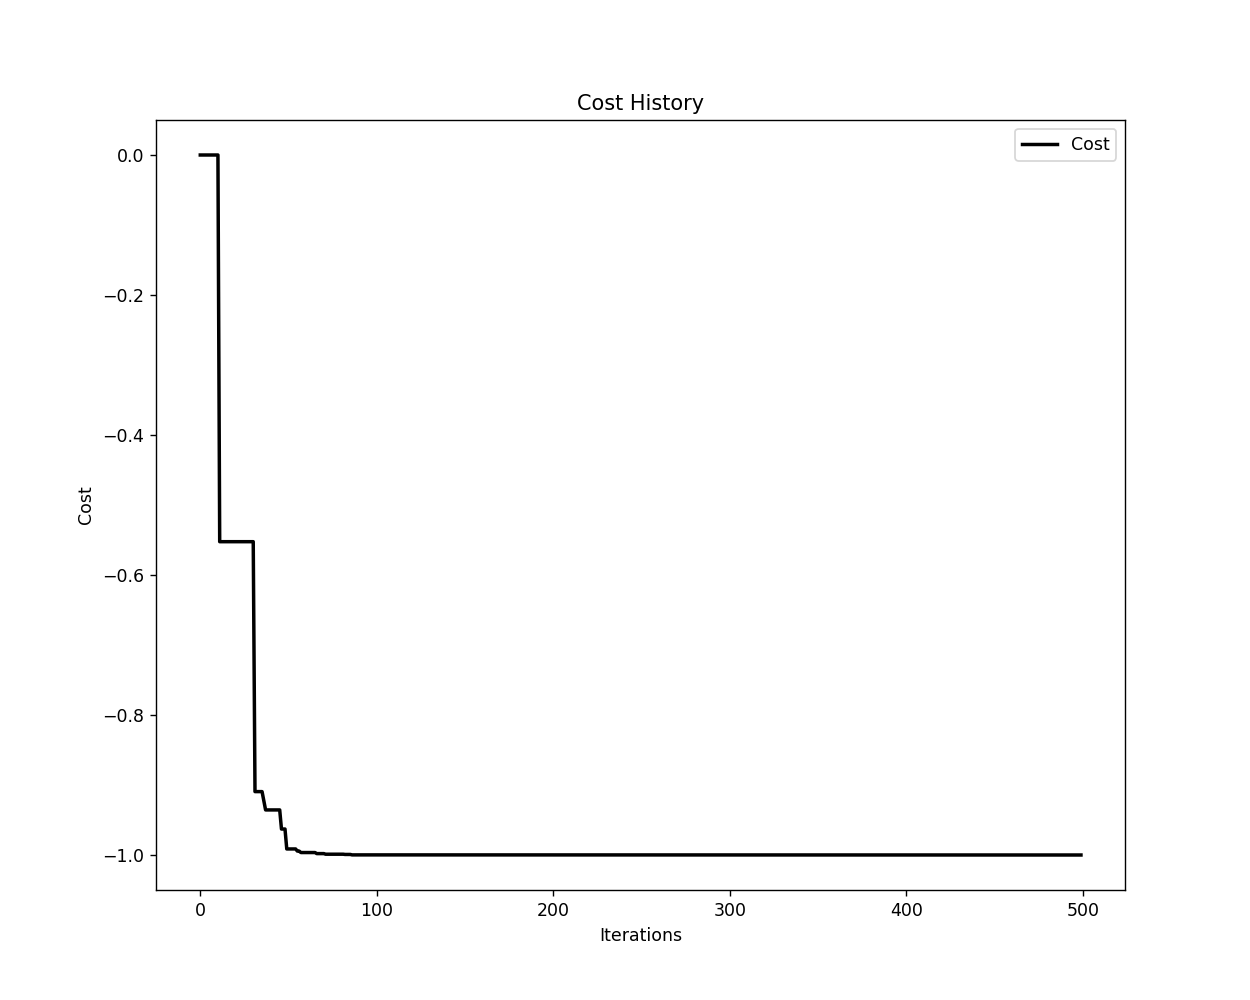

Время выполнения  0.2835731506347656


In [38]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
# Create bounds
max_bound = 100 * np.ones(2)
min_bound = - max_bound
varbound = (min_bound, max_bound)

t=time.time()
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=varbound)
cost, pos = optimizer.optimize(easom_function2, iters=500)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
t=time.time()-t
print('Время выполнения ', t)

In [39]:
print('Координата лучшего решения ', pos)
print('Наименьшее достигнутое значение функции ', cost)

Координата лучшего решения  [3.14159266 3.14159265]
Наименьшее достигнутое значение функции  -1.0


<IPython.core.display.Javascript object>


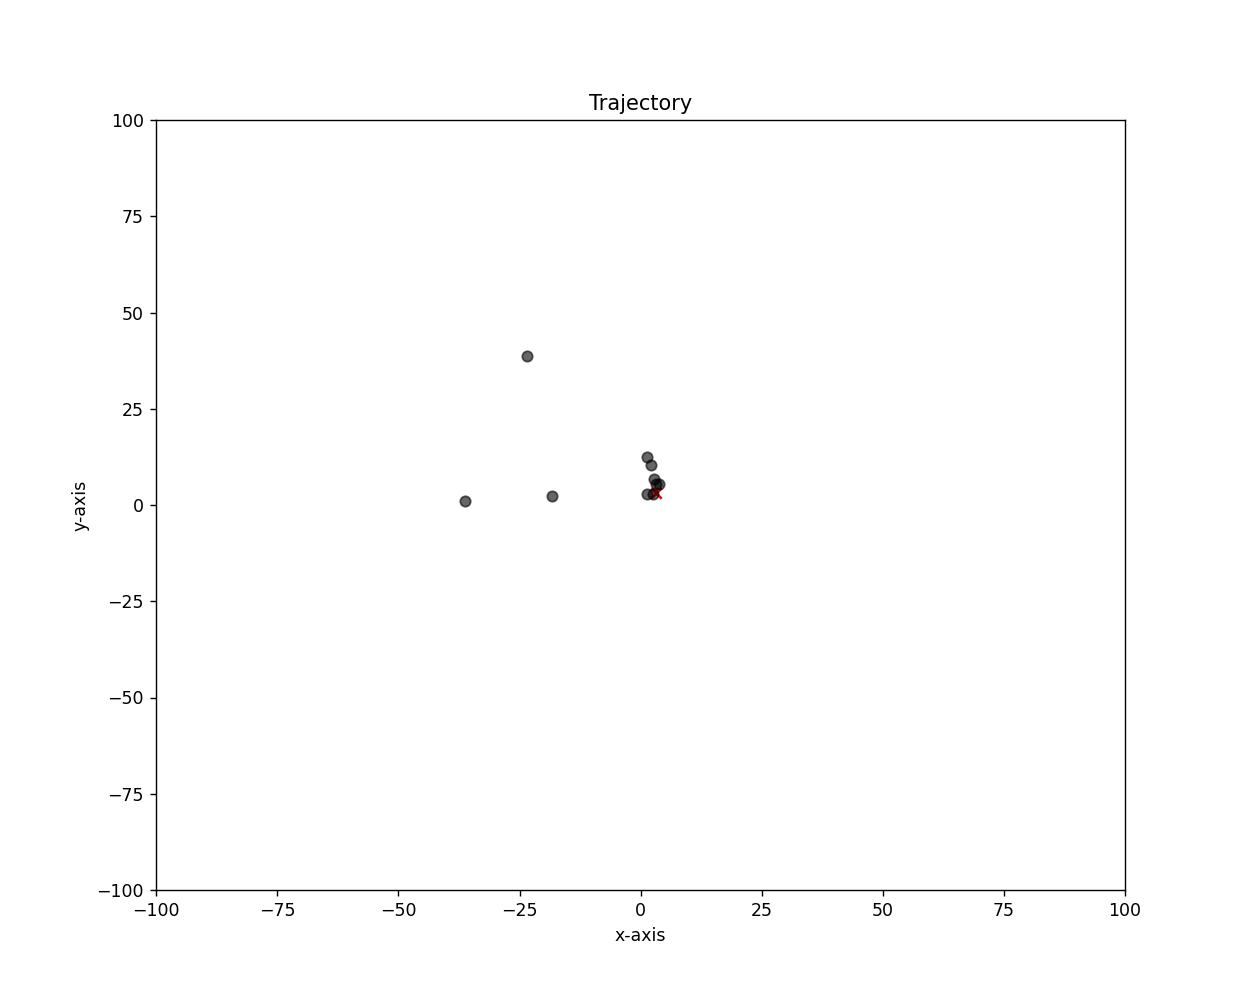

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\pyswarms\utils\plotters\plotters.py:222: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz, levels=mesher.levels)


In [40]:
# Initialize mesher with sphere function
m = Mesher(func=easom_function2)
d = Designer(limits=[(-100,100), (-100,100), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m, designer=d,
                         mark=(np.pi,np.pi))

In [41]:
animation.save('Easom swarm.gif', writer='imagemagick', fps=10)

2021-11-20 20:00:11,733 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2021-11-20 20:00:11,734 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


### 100 прогонов для вычисления мат ожидания и  дисперсии

In [49]:
mean_list = []

In [50]:
for i in range(100):
    print('Шаг итерации :', i)
    t=time.time()
    optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=varbound)
    cost, pos = optimizer.optimize(easom_function2, iters=500)
    t=time.time()-t
    print('Время выполнения ', t)
    mean_list.append(cost)

2021-11-20 20:07:32,785 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Шаг итерации : 0


pyswarms.single.global_best:   0%|                                                                  |0/500, best_cost=-c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\pyswarms\backend\handlers.py:387: RuntimeWarning: invalid value encountered in remainder
  new_pos[greater_than_bound] = lb[greater_than_bound] + np.mod(
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:33,065 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:33,070 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28349757194519043
Шаг итерации : 1


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:33,358 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:33,365 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.29321718215942383
Шаг итерации : 2


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:33,650 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:33,657 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.292217493057251
Шаг итерации : 3


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:33,940 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:33,950 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2891817092895508
Шаг итерации : 4


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:34,231 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:34,243 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2902238368988037
Шаг итерации : 5


pyswarms.single.global_best:  76%|████████████████████████████████████████████████▊               |381/500, best_cost=-IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:36,098 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:36,104 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2573118209838867
Шаг итерации : 12


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:36,387 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:36,400 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28822994232177734
Шаг итерации : 13


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:36,682 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:36,704 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2962472438812256
Шаг итерации : 14


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:36,960 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:36,964 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2762620449066162
Шаг итерации : 15


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:37,258 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:37,262 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2982017993927002
Шаг итерации : 16


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:37,569 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:37,588 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.31016969680786133
Шаг итерации : 17


pyswarms.single.global_best:   0%|                                                                  |0/500, best_cost=-IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:39,183 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:39,186 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.24733924865722656
Шаг итерации : 23


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:39,449 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:39,453 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2654385566711426
Шаг итерации : 24


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:39,734 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:39,739 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28520965576171875
Шаг итерации : 25


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:40,017 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:40,024 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2842400074005127
Шаг итерации : 26


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:40,294 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:40,301 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.27725839614868164
Шаг итерации : 27


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:40,573 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:40,581 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2792530059814453
Шаг итерации : 28


pyswarms.single.global_best:  37%|███████████████████████▉                                        |187/500, best_cost=-IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:42,460 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:42,468 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25531721115112305
Шаг итерации : 35


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:42,711 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:42,723 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25130534172058105
Шаг итерации : 36


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:42,964 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:42,980 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2533233165740967
Шаг итерации : 37


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:43,240 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:43,244 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.27426600456237793
Шаг итерации : 38


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:43,529 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:43,533 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28819799423217773
Шаг итерации : 39


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:43,822 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:43,826 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.29421353340148926
Шаг итерации : 40


pyswarms.single.global_best:   0%|                                                                  |0/500, best_cost=-IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:45,464 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:45,473 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25033020973205566
Шаг итерации : 46


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:45,719 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:45,730 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.256314754486084
Шаг итерации : 47


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:45,975 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:45,989 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2563145160675049
Шаг итерации : 48


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:46,245 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:46,254 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2698662281036377
Шаг итерации : 49


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:46,508 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:46,512 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26329541206359863
Шаг итерации : 50


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:46,801 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:46,805 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2920105457305908
Шаг итерации : 51


pyswarms.single.global_best:  63%|████████████████████████████████████████▌                       |317/500, best_cost=-IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:48,878 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:48,882 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2772643566131592
Шаг итерации : 58


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:49,163 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:49,167 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28623437881469727
Шаг итерации : 59


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:49,439 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:49,443 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2762618064880371
Шаг итерации : 60


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:49,721 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:49,725 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2812469005584717
Шаг итерации : 61


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:50,033 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:50,042 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.312164306640625
Шаг итерации : 62


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:50,337 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:50,343 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.30335092544555664
Шаг итерации : 63


pyswarms.single.global_best:   0%|                                                                  |0/500, best_cost=-IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:52,083 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:52,089 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.27426624298095703
Шаг итерации : 69


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:52,348 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:52,359 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26628708839416504
Шаг итерации : 70


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:52,608 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:52,618 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26030445098876953
Шаг итерации : 71


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:52,862 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:52,876 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25333499908447266
Шаг итерации : 72


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:53,124 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:53,128 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.26130104064941406
Шаг итерации : 73


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:53,382 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:53,386 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25830984115600586
Шаг итерации : 74


pyswarms.single.global_best:   0%|                                                                  |0/500, best_cost=-IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:55,157 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:55,167 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.28324198722839355
Шаг итерации : 80


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:55,409 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:55,422 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2513267993927002
Шаг итерации : 81


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:55,663 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:55,678 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2543199062347412
Шаг итерации : 82


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:55,905 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:55,940 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.24235177040100098
Шаг итерации : 83


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:56,207 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:56,212 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.30019712448120117
Шаг итерации : 84


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:56,480 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:56,485 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.27426695823669434
Шаг итерации : 85


pyswarms.single.global_best:  73%|██████████████████████████████████████████████▋                 |365/500, best_cost=-IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:58,602 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:58,606 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2989969253540039
Шаг итерации : 92


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:58,878 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:58,884 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2762613296508789
Шаг итерации : 93


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:59,136 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:59,143 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.25830888748168945
Шаг итерации : 94


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:59,387 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:59,395 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2513275146484375
Шаг итерации : 95


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:59,656 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:59,664 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.2682816982269287
Шаг итерации : 96


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|500/500, best_cost=-
2021-11-20 20:07:59,904 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.0, best pos: [-100.  100.]
2021-11-20 20:07:59,917 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Время выполнения  0.24733924865722656
Шаг итерации : 97


pyswarms.single.global_best:   0%|                                                                  |0/500, best_cost=-IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [51]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  0.0
Дисперсия:  0.0


#### Значение дисперсии оказалось нулевым, что говорит о сходимости алгоритма оптимизации

# Пчелиный алгоритм

#### Библиотека не обновлена в соответствии с изменениями matplotlib, поэтому исходный код немного изменен, это влияет только на визуализацию

Стандартная версия алгоритма пчел включает в себя две эвристики: сокращение района и закрытие участка. 
#### ДАННАЯ РЕАЛИЗАЦИЯ ОСУЩЕСТВЛЯЕТ ПОИСК МАКСИМУМА
Выполняется по шагам:
1. Оценить приспособленность населения в соответствии с целевой функцией;
2. Выберите лучшие nb-участки для поиска по соседству;
3. Набрать пчел-сборщиков NRB для выбранных участков (например, пчел для лучших участков) и оценить их пригодность;
4. Выберите наиболее приспособленную пчелу с каждого локального участка в качестве нового центра участка;
5. Если участок не может быть улучшен с помощью одного локального поиска, размер его окружения уменьшается (сужение соседства);
6. Если участок не может улучшиться в течение циклов stlim, участок покидают (закрытие участка);
7. Поручите оставшимся пчелам равномерно обыскать все пространство поиска и оценить их пригодность;
8. Если критерий остановки не соблюден, вернитесь к шагу 2;

Количество пчел-разведчиков - ns \
Количество участков, выбранных из ns посещенных участков - nb \
Количество элитных участков из nb выбранных участков - ne \
Количество пчел, набранных на лучшие новые участки - nre \
Количество пчел, нанятых для других (nb-ne) выбранных участков (nrb)

In [52]:
from bees_algorithm import BeesAlgorithm, visualize_steps

### Для функции Экли

In [53]:
# Пчелиный алгоритм ищет максимум, поэтому нужно взять функцию со знаком -
def negative_ackley(X):
    return - ackley_function(X)
search_boundaries=([-5,-5], [5,5])

t=time.time()
alg = BeesAlgorithm(negative_ackley,
                    search_boundaries[0],
                    search_boundaries[1],
                    ns = 10, nb= 18, ne = 1,
                    nrb = 5, nre = 10, stlim=100
                   )
alg.performFullOptimisation(max_iteration=500)
t=time.time()-t
print('Время выполнения ', t)

Время выполнения  0.46984267234802246


In [54]:
best = alg.best_solution #Получение лучшего решения
# лучшее достигнутое значение функции (точное значение -1.0)
# Значение умножается на -1, так как для поиска минимума мы умножали функцию на -1
print('Наименьшее достигнутое значение функции ', -best.score)
# Координаты лучшего решения (точное значение (pi, pi))
print('Координаты лучшего решения ', best.values)

Наименьшее достигнутое значение функции  0.0
Координаты лучшего решения  [-2.6958051654165217e-16, -1.7396359391595732e-16]


<IPython.core.display.Javascript object>


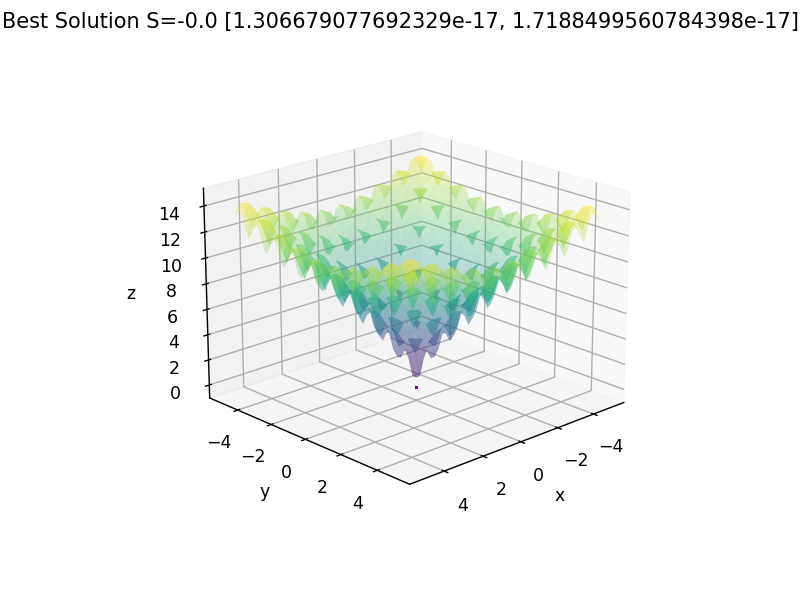

In [55]:
# Визуализация точного решения (код немного изменен)
ba_parameters = {'ns':10,'nb':18,'ne':1,'nrb':5,'nre':10, 'stlim':100}
visualize_steps(negative_ackley, search_boundaries, ba_parameters )

### 100 прогонов для вычисления мат ожидания и  дисперсии

In [56]:
mean_list = []

In [57]:
for i in range(100):
    print('Шаг итерации :', i)
    t=time.time()
    alg = BeesAlgorithm(negative_ackley,
                        search_boundaries[0],
                        search_boundaries[1],
                        ns = 10, nb= 18, ne = 1,
                        nrb = 5, nre = 10, stlim=100
                       )
    alg.performFullOptimisation(max_iteration=500)
    t=time.time()-t
    score = -alg.best_solution.score
    print('Наименьшее достигнутое значение функции: ', score)
    print('Время выполнения ', t)
    mean_list.append(score)

Шаг итерации : 0
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.49211573600769043
Шаг итерации : 1
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.46575427055358887
Шаг итерации : 2
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.469268798828125
Шаг итерации : 3
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.460766077041626
Шаг итерации : 4
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.4637613296508789
Шаг итерации : 5
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.46578145027160645
Шаг итерации : 6
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.46813392639160156
Шаг итерации : 7
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.45626020431518555
Шаг итерации : 8
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.4689192771911621
Шаг итерации : 9
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.47179985046386

Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.46173906326293945
Шаг итерации : 82
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.45181894302368164
Шаг итерации : 83
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.4581565856933594
Шаг итерации : 84
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.45379137992858887
Шаг итерации : 85
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.46294212341308594
Шаг итерации : 86
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.46079277992248535
Шаг итерации : 87
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.4549586772918701
Шаг итерации : 88
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.46082496643066406
Шаг итерации : 89
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.46625638008117676
Шаг итерации : 90
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.49570369720458984


In [58]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  0.0
Дисперсия:  0.0


#### Значение дисперсии оказалось нулевым, что говорит о сходимости алгоритма оптимизации

### Для функции Била

In [59]:
# Пчелиный алгоритм ищет максимум, поэтому нужно взять функцию со знаком -
def negative_beale(X):
    return - beale_function(X)
search_boundaries=([-4.5,-4.5], [4.5,4.5])

t=time.time()
alg = BeesAlgorithm(negative_beale,
                    search_boundaries[0],
                    search_boundaries[1],
                    ns = 10, nb= 18, ne = 1,
                    nrb = 5, nre = 10, stlim=100
                   )
alg.performFullOptimisation(max_iteration=500)
t=time.time()-t
print('Время выполнения ', t)

Время выполнения  0.3093383312225342


In [60]:
best = alg.best_solution #Получение лучшего решения
# лучшее достигнутое значение функции (точное значение -1.0)
# Значение умножается на -1, так как для поиска минимума мы умножали функцию на -1
print('Наименьшее достигнутое значение функции ', -best.score)
# Координаты лучшего решения (точное значение (pi, pi))
print('Координаты лучшего решения ', best.values)

Наименьшее достигнутое значение функции  0.0
Координаты лучшего решения  [3.0, 0.5]


<IPython.core.display.Javascript object>


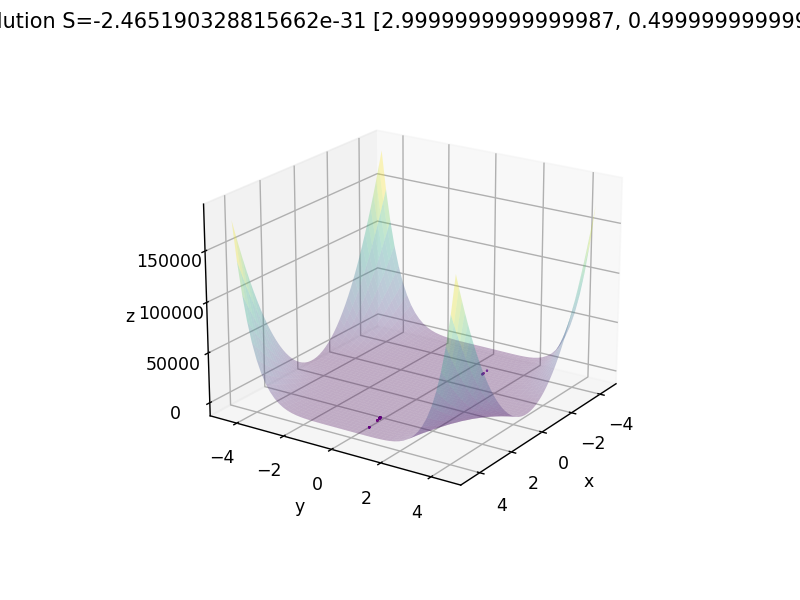

In [61]:
# Визуализация точного решения (код немного изменен)
ba_parameters = {'ns':10,'nb':18,'ne':1,'nrb':5,'nre':10, 'stlim':100}
visualize_steps(negative_beale, search_boundaries, ba_parameters )

### 100 прогонов для вычисления мат ожидания и  дисперсии

In [62]:
mean_list = []

In [63]:
for i in range(100):
    print('Шаг итерации :', i)
    t=time.time()
    alg = BeesAlgorithm(negative_beale,
                        search_boundaries[0],
                        search_boundaries[1],
                        ns = 10, nb= 18, ne = 1,
                        nrb = 5, nre = 10, stlim=100
                       )
    alg.performFullOptimisation(max_iteration=500)
    t=time.time()-t
    score = -alg.best_solution.score
    print('Наименьшее достигнутое значение функции: ', score)
    print('Время выполнения ', t)
    mean_list.append(score)

Шаг итерации : 0
Наименьшее достигнутое значение функции:  2.7733391199176196e-32
Время выполнения  0.3105597496032715
Шаг итерации : 1
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.2982029914855957
Шаг итерации : 2
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.30234646797180176
Шаг итерации : 3
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.3041963577270508
Шаг итерации : 4
Наименьшее достигнутое значение функции:  6.162975822039155e-32
Время выполнения  0.30817437171936035
Шаг итерации : 5
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.30820703506469727
Шаг итерации : 6
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.3091731071472168
Шаг итерации : 7
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.3151845932006836
Шаг итерации : 8
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.3215935230255127
Шаг итерации : 9
Наименьшее достигнутое значение функции:  0

Наименьшее достигнутое значение функции:  6.162975822039155e-32
Время выполнения  0.30219149589538574
Шаг итерации : 78
Наименьшее достигнутое значение функции:  6.162975822039155e-32
Время выполнения  0.29720568656921387
Шаг итерации : 79
Наименьшее достигнутое значение функции:  1.2634100435180267e-31
Время выполнения  0.30219101905822754
Шаг итерации : 80
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.3011958599090576
Шаг итерации : 81
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.30219030380249023
Шаг итерации : 82
Наименьшее достигнутое значение функции:  6.162975822039155e-32
Время выполнения  0.3052082061767578
Шаг итерации : 83
Наименьшее достигнутое значение функции:  7.179866832675615e-31
Время выполнения  0.30860447883605957
Шаг итерации : 84
Наименьшее достигнутое значение функции:  2.7733391199176196e-32
Время выполнения  0.2992279529571533
Шаг итерации : 85
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.30520415306

In [64]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  9.524879132961514e-32
Дисперсия:  8.460324772003955e-62


#### Значение дисперсии крайне мало, что говорит о сходимости алгоритма оптимизации

### Для функции Изома

In [65]:
# Пчелиный алгоритм ищет максимум, поэтому нужно взять функцию со знаком -
def negative_easom(X):
    return - easom_function(X)
search_boundaries=([-100.0, -100.0], [100.0, 100.0])

t=time.time()
alg = BeesAlgorithm(negative_easom,
                    search_boundaries[0],
                    search_boundaries[1],
                    ns = 10, nb= 18, ne = 1,
                    nrb = 5, nre = 10, stlim=100
                   )
alg.performFullOptimisation(max_iteration=500)
t=time.time()-t
print('Время выполнения ', t)

Время выполнения  0.3092961311340332


In [66]:
best = alg.best_solution #Получение лучшего решения
# лучшее достигнутое значение функции (точное значение -1.0)
# Значение умножается на -1, так как для поиска минимума мы умножали функцию на -1
print('Наименьшее достигнутое значение функции ', -best.score)
# Координаты лучшего решения (точное значение (pi, pi))
print('Координаты лучшего решения ', best.values)

Наименьшее достигнутое значение функции  -1.0
Координаты лучшего решения  [3.14159265731395, 3.1415926558903693]


<IPython.core.display.Javascript object>


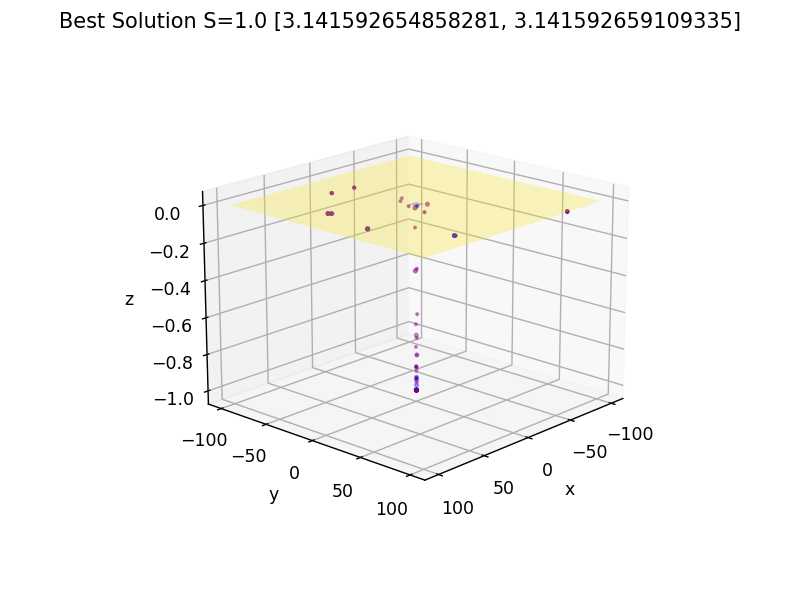

In [67]:
# Визуализация точного решения (код немного изменен)
ba_parameters = {'ns':10,'nb':18,'ne':1,'nrb':5,'nre':10, 'stlim':100}
visualize_steps(negative_easom, search_boundaries, ba_parameters )

### 100 прогонов для вычисления мат ожидания и  дисперсии

In [68]:
mean_list = []

In [69]:
for i in range(100):
    print('Шаг итерации :', i)
    t=time.time()
    alg = BeesAlgorithm(negative_easom,
                        search_boundaries[0],
                        search_boundaries[1],
                        ns = 10, nb= 18, ne = 1,
                        nrb = 5, nre = 10, stlim=100
                       )
    alg.performFullOptimisation(max_iteration=500)
    t=time.time()-t
    score = -alg.best_solution.score
    print('Наименьшее достигнутое значение функции: ', score)
    print('Время выполнения ', t)
    mean_list.append(score)

Шаг итерации : 0
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3082561492919922
Шаг итерации : 1
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3041863441467285
Шаг итерации : 2
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3061823844909668
Шаг итерации : 3
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3083302974700928
Шаг итерации : 4
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.31415700912475586
Шаг итерации : 5
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3156321048736572
Шаг итерации : 6
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.31761908531188965
Шаг итерации : 7
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3012576103210449
Шаг итерации : 8
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.2991664409637451
Шаг итерации : 9
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.29820

Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3091733455657959
Шаг итерации : 82
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.30219149589538574
Шаг итерации : 83
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3012237548828125
Шаг итерации : 84
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3121650218963623
Шаг итерации : 85
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.2993462085723877
Шаг итерации : 86
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3047020435333252
Шаг итерации : 87
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.301224946975708
Шаг итерации : 88
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.3031909465789795
Шаг итерации : 89
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.30118823051452637
Шаг итерации : 90
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.30119419097900

In [70]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  -1.0
Дисперсия:  0.0


#### Значение дисперсии оказалось нулевым, что говорит о сходимости алгоритма оптимизации

# Алгоритм дифференциальной эволюции


In [71]:
from scipy.optimize import differential_evolution

### Для функции Экли

In [72]:
progress = []
progress_val = []

def cb(x, convergence):
    progress.append(x)
    progress_val.append(ackley_function(x))

search_boundaries=([-5,5], [-5,5])
t=time.time()
result = differential_evolution(ackley_function, search_boundaries, disp=True, callback=cb)

progress = np.array(progress)
progress_val = np.array(progress_val)
t=time.time()-t
print('Время выполнения ', t)

differential_evolution step 1: f(x)= 1.83007
differential_evolution step 2: f(x)= 1.83007
differential_evolution step 3: f(x)= 1.83007
differential_evolution step 4: f(x)= 1.83007
differential_evolution step 5: f(x)= 0.984056
differential_evolution step 6: f(x)= 0.786006
differential_evolution step 7: f(x)= 0.155953
differential_evolution step 8: f(x)= 0.0171139
differential_evolution step 9: f(x)= 0.0171139
differential_evolution step 10: f(x)= 0.0171139
differential_evolution step 11: f(x)= 0.0171139
differential_evolution step 12: f(x)= 0.0171139
differential_evolution step 13: f(x)= 0.0171139
differential_evolution step 14: f(x)= 0.0171139
differential_evolution step 15: f(x)= 0.00653441
differential_evolution step 16: f(x)= 0.00450532
differential_evolution step 17: f(x)= 0.00450532
differential_evolution step 18: f(x)= 0.00182629
differential_evolution step 19: f(x)= 0.000869935
differential_evolution step 20: f(x)= 0.000637852
differential_evolution step 21: f(x)= 0.000637852
di

In [73]:
# лучшее достигнутое значение функции (точное значение 0)
print('Наименьшее достигнутое значение функции: ', result.fun)
# Координаты лучшего решения (точное значение (0, 0))
print('Координаты лучшего решения: ', result.x)

Наименьшее достигнутое значение функции:  0.0
Координаты лучшего решения:  [0. 0.]


<IPython.core.display.Javascript object>


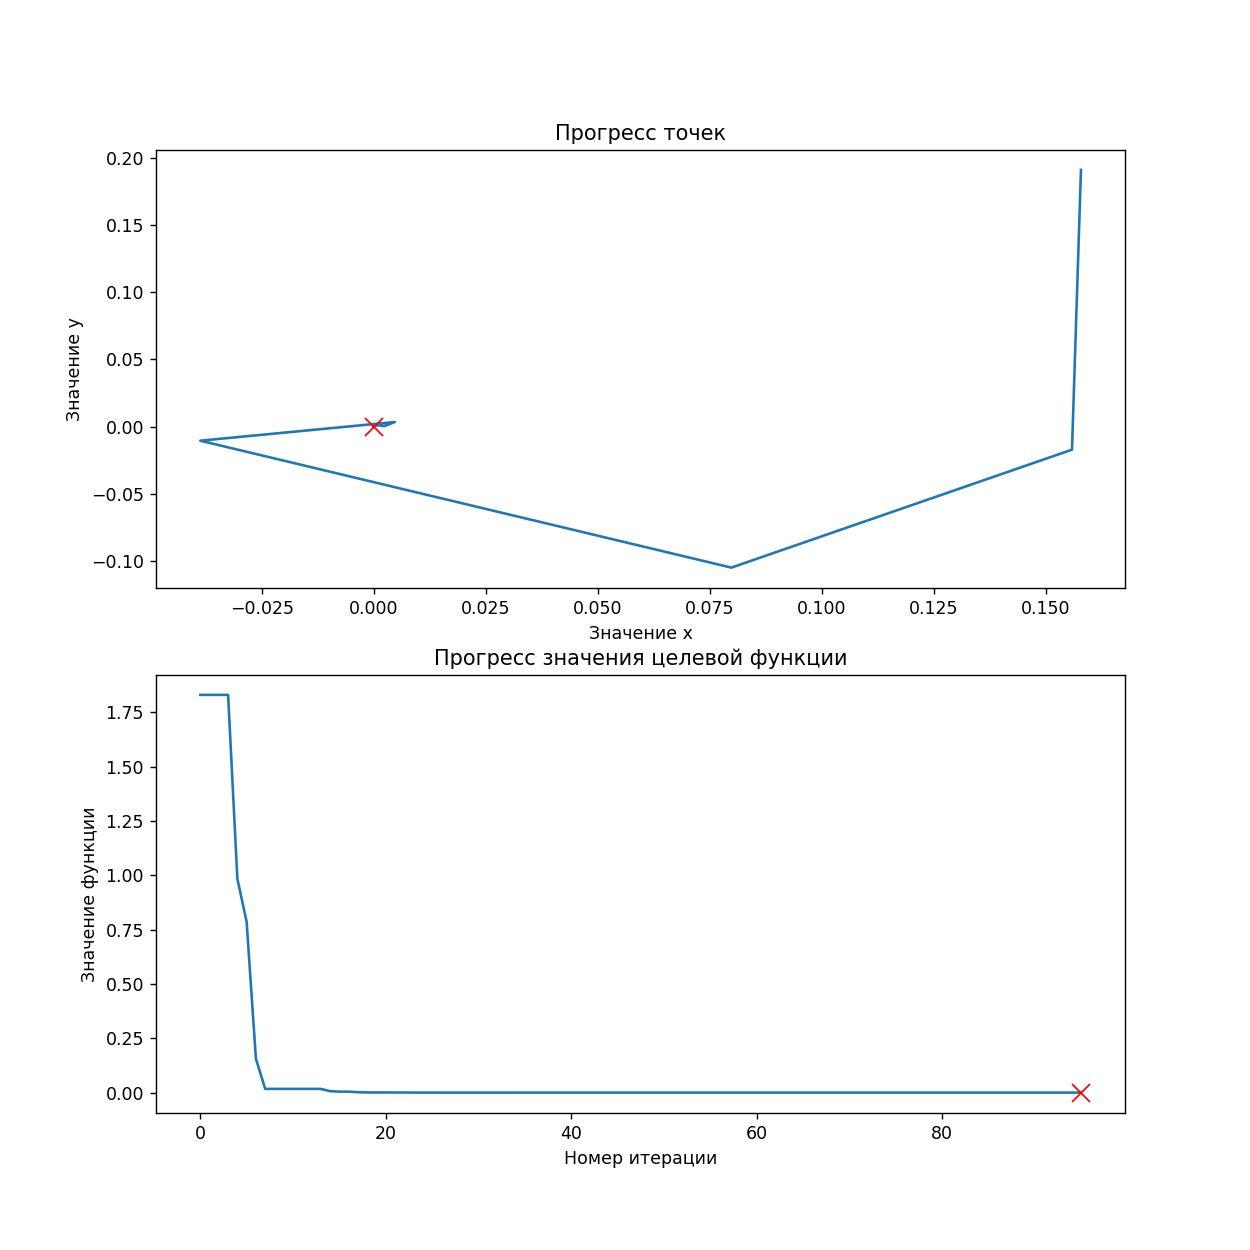

In [74]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax.title.set_text('Прогресс точек')
ax.set_xlabel('Значение x')
ax.set_ylabel('Значение y')
ax.plot(progress[:, 0], progress[:, 1])
ax.plot(progress[-1, 0], progress[-1, 1], 'rx', markersize=10)
ax = fig.add_subplot(2,1,2)
ax.title.set_text('Прогресс значения целевой функции')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Значение функции')
ax.plot(progress_val)
ax.plot(len(progress_val)-1,progress_val[-1],'rx', markersize=10)
plt.show()

### 100 прогонов для вычисления мат ожидания и  дисперсии

In [75]:
mean_list = []

In [76]:
for i in range(100):
    print('Шаг итерации :', i)
    t=time.time()
    result = differential_evolution(ackley_function, search_boundaries, disp=False)
    t=time.time()-t
    print('Наименьшее достигнутое значение функции: ', result.fun)
    print('Время выполнения ', t)
    mean_list.append(result.fun)

Шаг итерации : 0
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.1745452880859375
Шаг итерации : 1
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.1915144920349121
Шаг итерации : 2
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.14675617218017578
Шаг итерации : 3
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.17854547500610352
Шаг итерации : 4
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.16855096817016602
Шаг итерации : 5
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.16373467445373535
Шаг итерации : 6
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.1745438575744629
Шаг итерации : 7
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.17251205444335938
Шаг итерации : 8
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.16057229042053223
Шаг итерации : 9
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.16555571556

Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.20046520233154297
Шаг итерации : 82
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.1641371250152588
Шаг итерации : 83
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.16954636573791504
Шаг итерации : 84
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.17353582382202148
Шаг итерации : 85
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.17550134658813477
Шаг итерации : 86
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.16954660415649414
Шаг итерации : 87
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.17453336715698242
Шаг итерации : 88
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.1715412139892578
Шаг итерации : 89
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.17054367065429688
Шаг итерации : 90
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.16655445098876953


In [77]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  3.552713678800501e-17
Дисперсия:  1.2495556738700826e-31


#### Значение дисперсии крайне мало, что говорит о сходимости алгоритма оптимизации

### Для функции Била

In [78]:
progress = []
progress_val = []

def cb(x, convergence):
    progress.append(x)
    progress_val.append(beale_function(x))

search_boundaries=([-4.5,4.5], [-4.5,4.5])
t=time.time()
result = differential_evolution(beale_function, search_boundaries, disp=True, callback=cb)

progress = np.array(progress)
progress_val = np.array(progress_val)
t=time.time()-t
print('Время выполнения ', t)

differential_evolution step 1: f(x)= 1.513
differential_evolution step 2: f(x)= 0.281968
differential_evolution step 3: f(x)= 0.281968
differential_evolution step 4: f(x)= 0.281968
differential_evolution step 5: f(x)= 0.281968
differential_evolution step 6: f(x)= 0.0611849
differential_evolution step 7: f(x)= 0.0522505
differential_evolution step 8: f(x)= 0.0193155
differential_evolution step 9: f(x)= 0.0193155
differential_evolution step 10: f(x)= 0.0193155
differential_evolution step 11: f(x)= 0.00534219
differential_evolution step 12: f(x)= 0.00173723
differential_evolution step 13: f(x)= 0.00173723
differential_evolution step 14: f(x)= 5.31608e-05
differential_evolution step 15: f(x)= 5.31608e-05
differential_evolution step 16: f(x)= 5.31608e-05
differential_evolution step 17: f(x)= 5.31608e-05
differential_evolution step 18: f(x)= 2.65787e-05
differential_evolution step 19: f(x)= 1.78886e-05
differential_evolution step 20: f(x)= 5.54245e-06
differential_evolution step 21: f(x)= 5.

In [79]:
# лучшее достигнутое значение функции (точное значение 0)
print('Наименьшее достигнутое значение функции: ', result.fun)
# Координаты лучшего решения (точное значение (0, 0))
print('Координаты лучшего решения: ', result.x)

Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Координаты лучшего решения:  [3.  0.5]


<IPython.core.display.Javascript object>


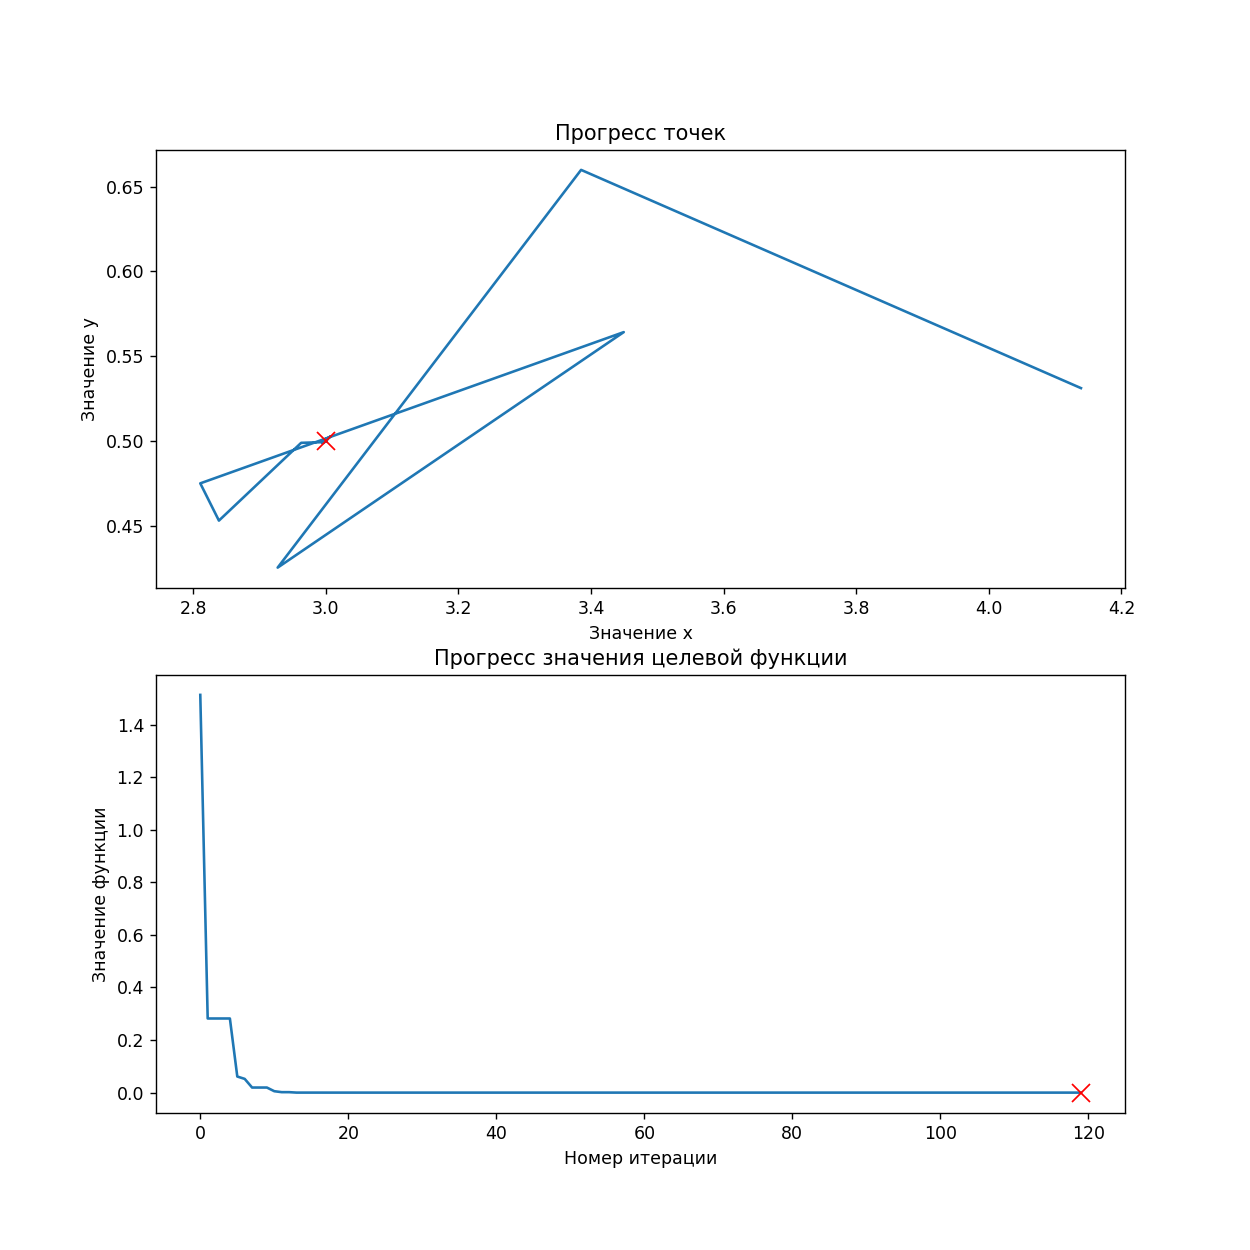

In [80]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax.title.set_text('Прогресс точек')
ax.set_xlabel('Значение x')
ax.set_ylabel('Значение y')
ax.plot(progress[:, 0], progress[:, 1])
ax.plot(progress[-1, 0], progress[-1, 1], 'rx', markersize=10)
ax = fig.add_subplot(2,1,2)
ax.title.set_text('Прогресс значения целевой функции')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Значение функции')
ax.plot(progress_val)
ax.plot(len(progress_val)-1,progress_val[-1],'rx', markersize=10)
plt.show()

### 100 прогонов для вычисления мат ожидания и  дисперсии

In [93]:
mean_list = []

In [94]:
for i in range(100):
    print('Шаг итерации :', i)
    t=time.time()
    result = differential_evolution(beale_function, search_boundaries, disp=False)
    t=time.time()-t
    print('Наименьшее достигнутое значение функции: ', result.fun)
    print('Время выполнения ', t)
    mean_list.append(result.fun)

Шаг итерации : 0
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.1783308982849121
Шаг итерации : 1
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.19351434707641602
Шаг итерации : 2
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.19145727157592773
Шаг итерации : 3
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.18151450157165527
Шаг итерации : 4
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.17353606224060059
Шаг итерации : 5
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.18151354789733887
Шаг итерации : 6
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.19348382949829102
Шаг итерации : 7
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.17253804206848145
Шаг итерации : 8
Наименьшее достигнутое з

Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.17652654647827148
Шаг итерации : 70
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.17453289031982422
Шаг итерации : 71
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.18849587440490723
Шаг итерации : 72
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.17453312873840332
Шаг итерации : 73
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.1825118064880371
Шаг итерации : 74
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.17253851890563965
Шаг итерации : 75
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.18450665473937988
Шаг итерации : 76
Наименьшее достигнутое значение функции:  3.2047474274603605e-31
Время выполнения  0.1948392391204834
Шаг итерации : 77
Наименьшее достигнутое значение фу

In [95]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  0.03048278603577497
Дисперсия:  0.022300805868068117


#### Значение дисперсии мало, однако в двух итерациях наименьшее значение оказалось около 0.7 в связи с чем дисперсия выросла до 0.02

### Для функции Изома

In [84]:
progress = []
progress_val = []

def cb(x, convergence):
    progress.append(x)
    progress_val.append(easom_function(x))

search_boundaries=([-100,100], [-100,100])
t=time.time()
result = differential_evolution(easom_function, search_boundaries, disp=True, callback=cb)

progress = np.array(progress)
progress_val = np.array(progress_val)
t=time.time()-t
print('Время выполнения ', t)

differential_evolution step 1: f(x)= -4.64351e-44
differential_evolution step 2: f(x)= -4.64351e-44
differential_evolution step 3: f(x)= -4.64351e-44
differential_evolution step 4: f(x)= -6.17498e-41
differential_evolution step 5: f(x)= -4.57427e-27
differential_evolution step 6: f(x)= -4.57427e-27
differential_evolution step 7: f(x)= -4.57427e-27
differential_evolution step 8: f(x)= -5.55752e-23
differential_evolution step 9: f(x)= -0.846789
differential_evolution step 10: f(x)= -0.846789
differential_evolution step 11: f(x)= -0.846789
differential_evolution step 12: f(x)= -0.846789
differential_evolution step 13: f(x)= -0.846789
differential_evolution step 14: f(x)= -0.846789
differential_evolution step 15: f(x)= -0.846789
differential_evolution step 16: f(x)= -0.846789
differential_evolution step 17: f(x)= -0.846789
differential_evolution step 18: f(x)= -0.846789
differential_evolution step 19: f(x)= -0.953709
differential_evolution step 20: f(x)= -0.953709
differential_evolution st

In [85]:
# лучшее достигнутое значение функции (точное значение 0)
print('Наименьшее достигнутое значение функции: ', result.fun)
# Координаты лучшего решения (точное значение (0, 0))
print('Координаты лучшего решения: ', result.x)

Наименьшее достигнутое значение функции:  -0.9999999999999893
Координаты лучшего решения:  [3.14159271 3.14159271]


<IPython.core.display.Javascript object>


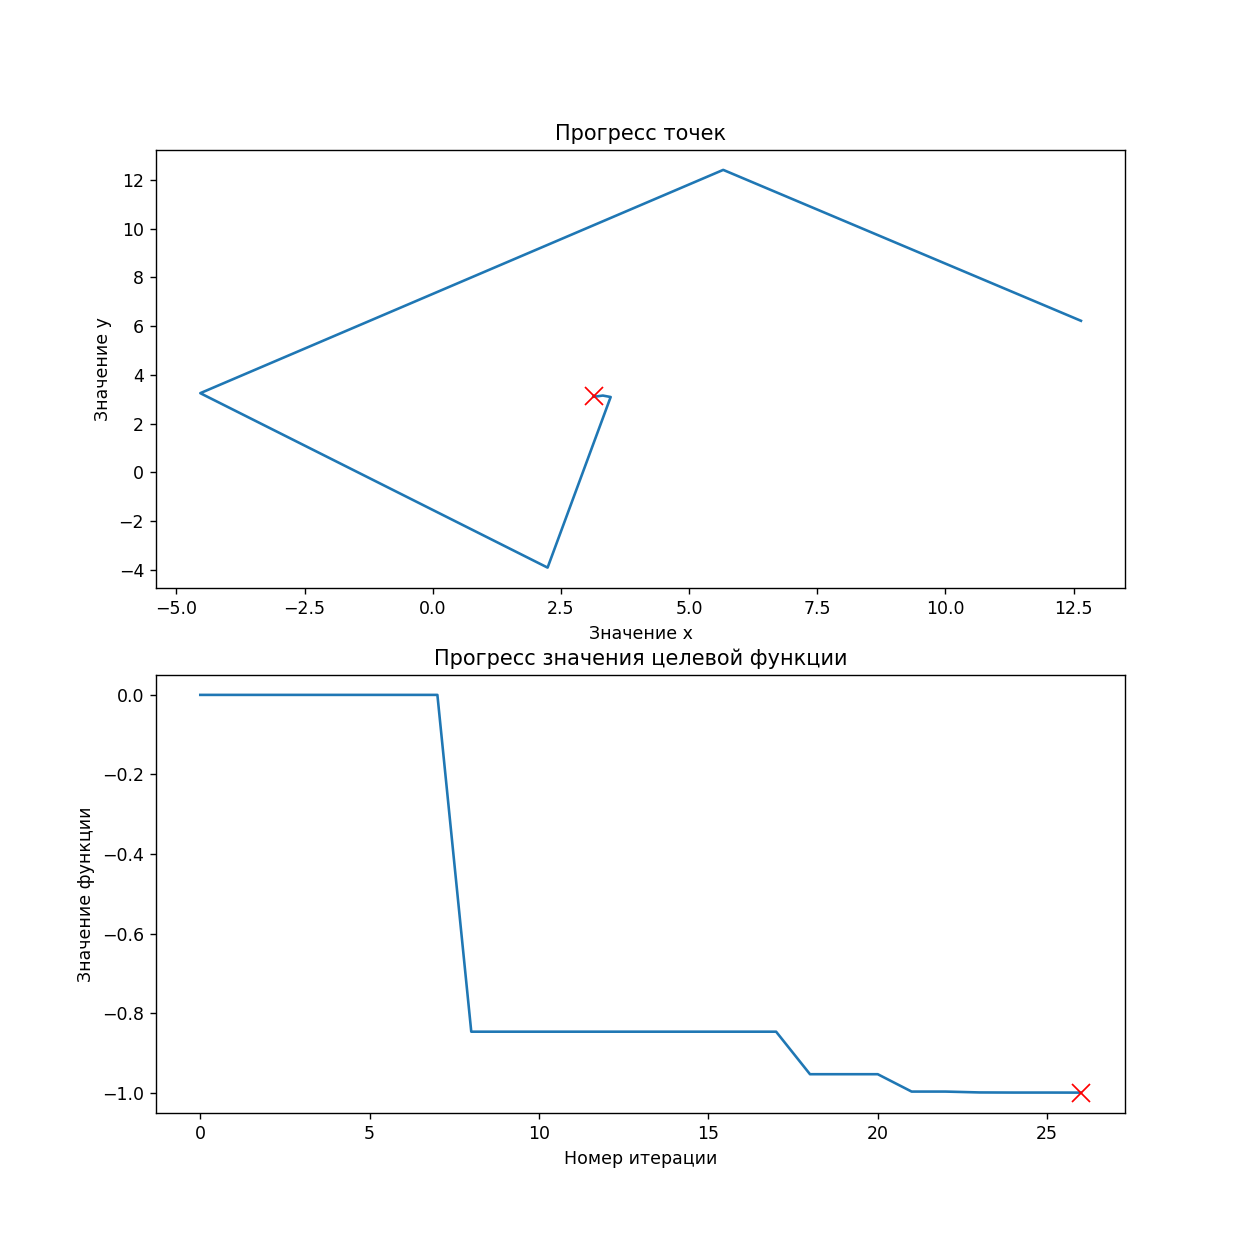

In [86]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax.title.set_text('Прогресс точек')
ax.set_xlabel('Значение x')
ax.set_ylabel('Значение y')
ax.plot(progress[:, 0], progress[:, 1])
ax.plot(progress[-1, 0], progress[-1, 1], 'rx', markersize=10)
ax = fig.add_subplot(2,1,2)
ax.title.set_text('Прогресс значения целевой функции')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Значение функции')
ax.plot(progress_val)
ax.plot(len(progress_val)-1,progress_val[-1],'rx', markersize=10)
plt.show()

### 100 прогонов для вычисления мат ожидания и  дисперсии

In [96]:
mean_list = []

In [97]:
for i in range(100):
    print('Шаг итерации :', i)
    t=time.time()
    result = differential_evolution(easom_function, search_boundaries, disp=False)
    t=time.time()-t
    print('Наименьшее достигнутое значение функции: ', result.fun)
    print('Время выполнения ', t)
    mean_list.append(result.fun)

Шаг итерации : 0
Наименьшее достигнутое значение функции:  -0.9999999999999803
Время выполнения  0.06083941459655762
Шаг итерации : 1
Наименьшее достигнутое значение функции:  -1.5640490810315736e-296
Время выполнения  0.001994609832763672
Шаг итерации : 2
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.043883323669433594
Шаг итерации : 3
Наименьшее достигнутое значение функции:  -0.0
Время выполнения  0.003988981246948242
Шаг итерации : 4
Наименьшее достигнутое значение функции:  -0.0
Время выполнения  0.003988742828369141
Шаг итерации : 5
Наименьшее достигнутое значение функции:  -1.1690204968687183e-186
Время выполнения  0.002992391586303711
Шаг итерации : 6
Наименьшее достигнутое значение функции:  0.0
Время выполнения  0.0039899349212646484
Шаг итерации : 7
Наименьшее достигнутое значение функции:  -2.49648950452877e-175
Время выполнения  0.0029914379119873047
Шаг итерации : 8
Наименьшее достигнутое значение функции:  -0.9999999999995921
Время выполнения  0.0448

Наименьшее достигнутое значение функции:  -0.9999999999957023
Время выполнения  0.05385589599609375
Шаг итерации : 74
Наименьшее достигнутое значение функции:  -1.2983173817824982e-235
Время выполнения  0.0019948482513427734
Шаг итерации : 75
Наименьшее достигнутое значение функции:  -0.9999999999959047
Время выполнения  0.05186176300048828
Шаг итерации : 76
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.05285072326660156
Шаг итерации : 77
Наименьшее достигнутое значение функции:  -0.9999999999999999
Время выполнения  0.04388260841369629
Шаг итерации : 78
Наименьшее достигнутое значение функции:  -1.0
Время выполнения  0.05186200141906738
Шаг итерации : 79
Наименьшее достигнутое значение функции:  -3.740243762001219e-221
Время выполнения  0.002991914749145508
Шаг итерации : 80
Наименьшее достигнутое значение функции:  -5.0051140854037243e-231
Время выполнения  0.002992391586303711
Шаг итерации : 81
Наименьшее достигнутое значение функции:  -3.4937827373889326e-299
В

In [98]:
print('Мат. ожидание: ', np.mean(mean_list))
print('Дисперсия: ', np.var(mean_list))

Мат. ожидание:  -0.699999999998675
Дисперсия:  0.20999999999920482


#### Значение дисперсии оказалось достаточно большим в связи с тем, что во время работы алгоритма оказались вырожденные значения, например 1.645290834142819e-228, однако в преобладающем большинстве итераций достигнутое значение функции было верным (около -1)

### Примечания
В папке с проектом лежат гиф файлы с анимацией того, как рой частиц обучался и постепенно достигал оптимального решения.

3д проекция для пчелиного алгоритма отображает промежуточные минимумы, которые были обнаружены алгоритмом. Исходный код пришлось немного отредактировать, так как он не совместим с текущей версией matplotlib.

Графики прогресса точек и значений отображают траекторию того как с каждой итерацией менялось решение. Красный крест обозначает финальное решение, оптимальную точку, которая была найдена алгоритмом.

### Выводы
Генетический алгоритм демонстрирует малое значение дисперсии и является сходимым, дисперсия порядка e-7 \
Алгоритма роя частиц показал еще более малые значения дисперсии, а также смог получить нулевую дисперсию для функции Изома \
Пчелиный алгоритм продемонстрировал лучшие результаты, для двух функций была получена нулевая дисперсия, а для третьей дисперсия была порядка e-64 \
Алгоритм дифференциальной эволюции оказался худшим, однако на значение дисперсии повлияли вырожденные значения, степень которых значительно отличалась от степени всего ряда